In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Importing Data

The data was collected from Youtube music, Spotify and Apple Music, and other top platforms used globally



In [ ]:
df = pd.read_csv("/content/Global_Music_Streaming_Listener_Preferences.csv")

In [ ]:
df.head(10)

User_ID  Age      Country Streaming Platform  Top Genre  \
0   U1000   34        Japan              Tidal     Reggae   
1   U1001   24      Germany             Deezer    Country   
2   U1002   49      Germany             Deezer        Pop   
3   U1003   55    Australia            YouTube     Reggae   
4   U1004   13      Germany       Amazon Music     Reggae   
5   U1005   25  South Korea            Spotify        EDM   
6   U1006   49    Australia              Tidal    Country   
7   U1007   32           UK       Amazon Music  Classical   
8   U1008   25      Germany              Tidal      Metal   
9   U1009   37       Brazil            Spotify     Reggae   

   Minutes Streamed Per Day  Number of Songs Liked Most Played Artist  \
0                       295                    138              Adele   
1                        86                    388         Ed Sheeran   
2                       363                    368        Post Malone   
3                       348                    349           Dua Lipa   
4                        30                    328              Adele   
5                       536                    243         The Weeknd   
6                       547                     70      Billie Eilish   
7                        98                    448           Dua Lipa   
8                       526                     27                BTS   
9                       514                    299      Billie Eilish   

  Subscription Type Listening Time (Morning/Afternoon/Night)  \
0              Free                                Afternoon   
1           Premium                                    Night   
2           Premium                                Afternoon   
3           Premium                                  Morning   
4              Free                                    Night   
5           Premium                                Afternoon   
6              Free                                    Night   
7           Premium                                Afternoon   
8           Premium                                  Morning   
9           Premium                                  Morning   

   Discover Weekly Engagement (%)  Repeat Song Rate (%)  
0                           47.42                 16.74  
1                           12.06                 69.25  
2                           47.19                 67.38  
3                           31.27                 76.51  
4                           30.68                 43.41  
5                           70.26                 27.79  
6                           11.92                 37.75  
7                           29.48                 18.80  
8                           85.70                 42.38  
9                           53.39                 46.89

In [ ]:
print("Dataset Shape:", df.shape)


Dataset Shape: (5000, 12)


In [ ]:
print("\nDataset Information:")
df.info()



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   User_ID                                   5000 non-null   object 
 1   Age                                       5000 non-null   int64  
 2   Country                                   5000 non-null   object 
 3   Streaming Platform                        5000 non-null   object 
 4   Top Genre                                 5000 non-null   object 
 5   Minutes Streamed Per Day                  5000 non-null   int64  
 6   Number of Songs Liked                     5000 non-null   int64  
 7   Most Played Artist                        5000 non-null   object 
 8   Subscription Type                         5000 non-null   object 
 9   Listening Time (Morning/Afternoon/Night)  5000 non-null   object 
 10  Discover Weekl

In [ ]:
print("\nDescriptive Statistics:")
df.describe()



Descriptive Statistics:


Age  Minutes Streamed Per Day  Number of Songs Liked  \
count  5000.000000               5000.000000             5000.00000   
mean     36.664000                309.237200              253.51720   
std      13.763844                172.029822              146.36928   
min      13.000000                 10.000000                1.00000   
25%      25.000000                161.000000              126.00000   
50%      37.000000                316.000000              254.00000   
75%      49.000000                457.250000              382.00000   
max      60.000000                600.000000              500.00000   

       Discover Weekly Engagement (%)  Repeat Song Rate (%)  
count                     5000.000000           5000.000000  
mean                        50.296464             42.391060  
std                         23.171936             21.444121  
min                         10.020000              5.000000  
25%                         30.147500             24.195000  
50%                         50.420000             41.960000  
75%                         70.337500             60.740000  
max                         89.990000             79.990000

# Data Pre-processing and PCA

In [ ]:
print("\nMissing Values:")
df.isnull().sum()


Missing Values:


User_ID                                     0
Age                                         0
Country                                     0
Streaming Platform                          0
Top Genre                                   0
Minutes Streamed Per Day                    0
Number of Songs Liked                       0
Most Played Artist                          0
Subscription Type                           0
Listening Time (Morning/Afternoon/Night)    0
Discover Weekly Engagement (%)              0
Repeat Song Rate (%)                        0
dtype: int64

since there are no missing values we can move ahead with this datasets and since we need all the attributes we need not to do a Principal component analysis.


In [ ]:
df.describe()

Age  Minutes Streamed Per Day  Number of Songs Liked  \
count  5000.000000               5000.000000             5000.00000   
mean     36.664000                309.237200              253.51720   
std      13.763844                172.029822              146.36928   
min      13.000000                 10.000000                1.00000   
25%      25.000000                161.000000              126.00000   
50%      37.000000                316.000000              254.00000   
75%      49.000000                457.250000              382.00000   
max      60.000000                600.000000              500.00000   

       Discover Weekly Engagement (%)  Repeat Song Rate (%)  
count                     5000.000000           5000.000000  
mean                        50.296464             42.391060  
std                         23.171936             21.444121  
min                         10.020000              5.000000  
25%                         30.147500             24.195000  
50%                         50.420000             41.960000  
75%                         70.337500             60.740000  
max                         89.990000             79.990000

# Exploratory Data Analysis


In [ ]:
plt.style.use('seaborn-v0_8')
sns.set_palette("viridis")
plt.rcParams['figure.figsize'] = (12, 8)

In [ ]:
def save_plot(filename):
    plt.show()
    plt.tight_layout()
    plt.savefig(f"{filename}.png", dpi=300)
    plt.close()

## Univariate Analysis


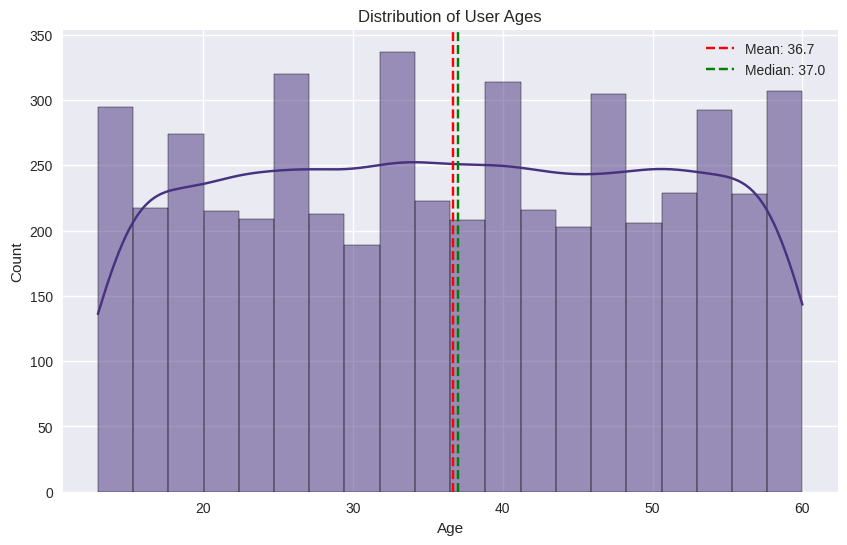

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=20)
plt.title('Distribution of User Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.axvline(df['Age'].mean(), color='red', linestyle='--', label=f'Mean: {df["Age"].mean():.1f}')
plt.axvline(df['Age'].median(), color='green', linestyle='--', label=f'Median: {df["Age"].median():.1f}')
plt.legend()
plt.show()
save_plot('age_distribution')

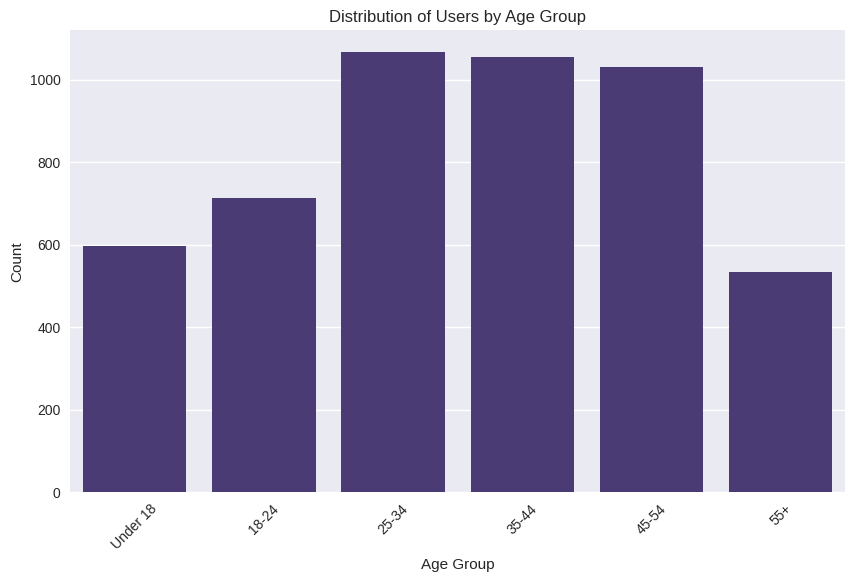

In [ ]:
age_bins = [0, 18, 25, 35, 45, 55, 100]
age_labels = ['Under 18', '18-24', '25-34', '35-44', '45-54', '55+']
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

plt.figure(figsize=(10, 6))
age_counts = df['Age_Group'].value_counts().sort_index()
sns.barplot(x=age_counts.index, y=age_counts.values)
plt.title('Distribution of Users by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
save_plot('age_groups')

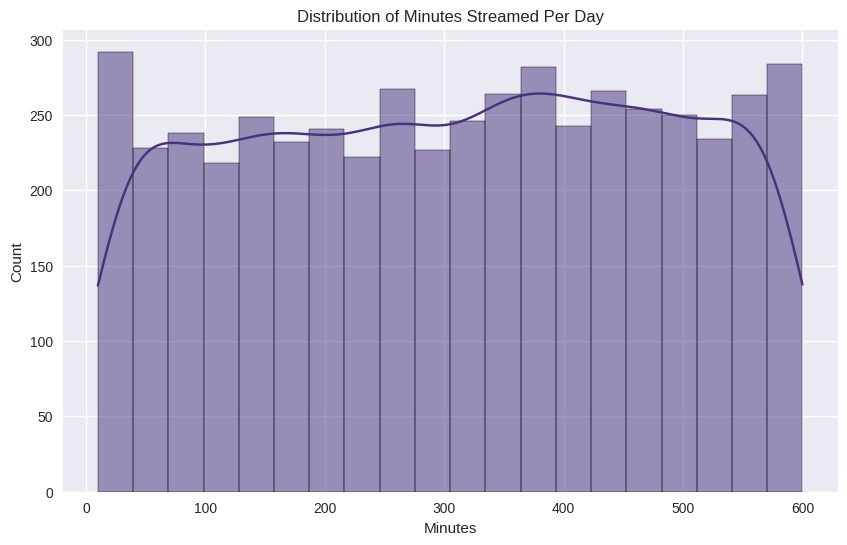

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Minutes Streamed Per Day'], kde=True, bins=20)
plt.title('Distribution of Minutes Streamed Per Day')
plt.xlabel('Minutes')
plt.ylabel('Count')
save_plot('minutes_streamed_distribution')

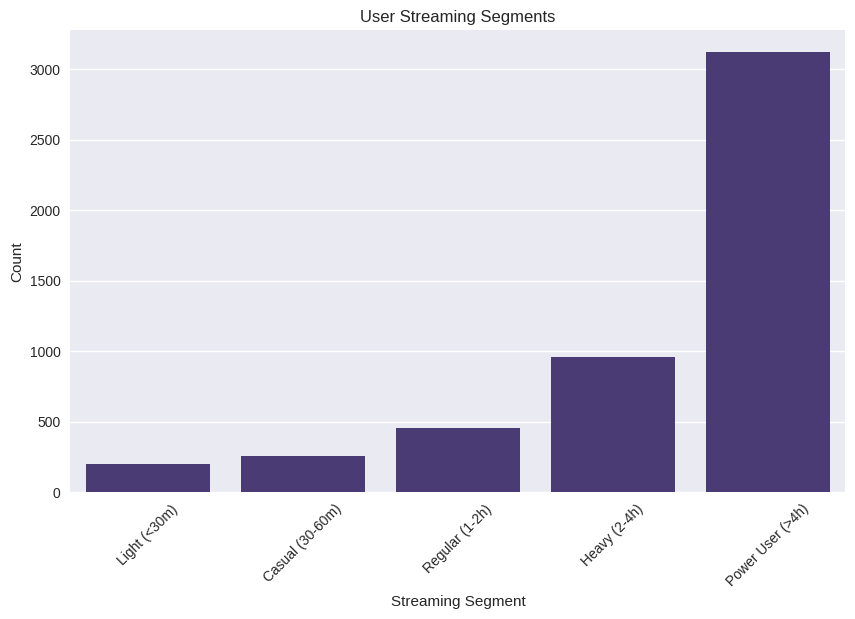

In [ ]:
streaming_bins = [0, 30, 60, 120, 240, 10000]
streaming_labels = ['Light (<30m)', 'Casual (30-60m)', 'Regular (1-2h)', 'Heavy (2-4h)', 'Power User (>4h)']
df['Streaming_Segment'] = pd.cut(df['Minutes Streamed Per Day'], bins=streaming_bins, labels=streaming_labels)

plt.figure(figsize=(10, 6))
streaming_counts = df['Streaming_Segment'].value_counts().sort_index()
sns.barplot(x=streaming_counts.index, y=streaming_counts.values)
plt.title('User Streaming Segments')
plt.xlabel('Streaming Segment')
plt.ylabel('Count')
plt.xticks(rotation=45)
save_plot('streaming_segments')

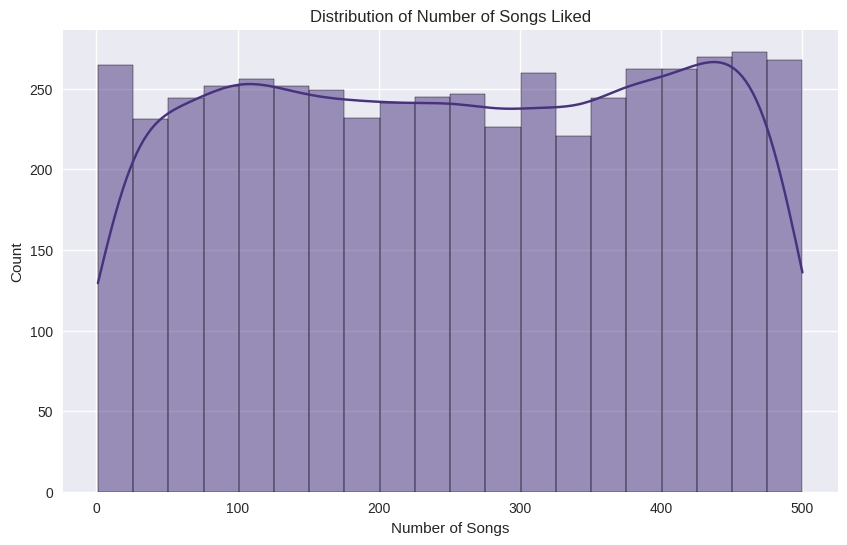

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Number of Songs Liked'], kde=True, bins=20)
plt.title('Distribution of Number of Songs Liked')
plt.xlabel('Number of Songs')
plt.ylabel('Count')
save_plot('songs_liked_distribution')

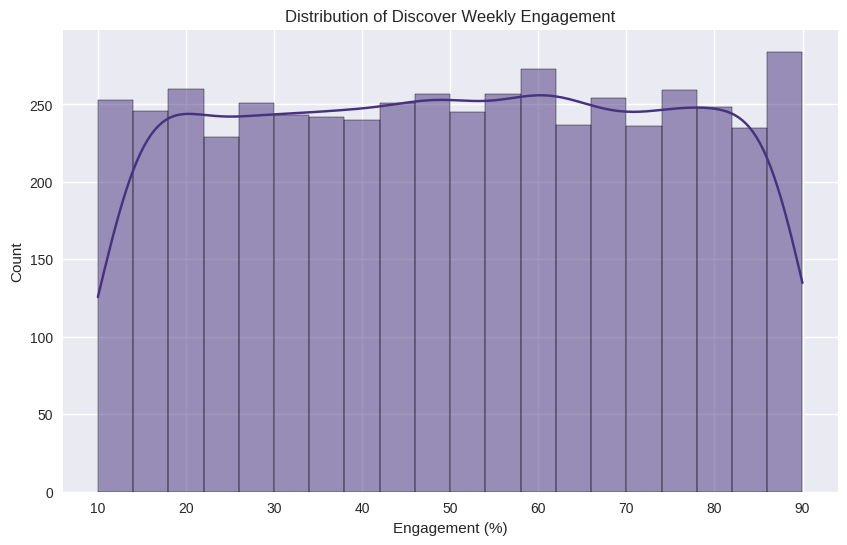

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Discover Weekly Engagement (%)'], kde=True, bins=20)
plt.title('Distribution of Discover Weekly Engagement')
plt.xlabel('Engagement (%)')
plt.ylabel('Count')
save_plot('discover_weekly_distribution')


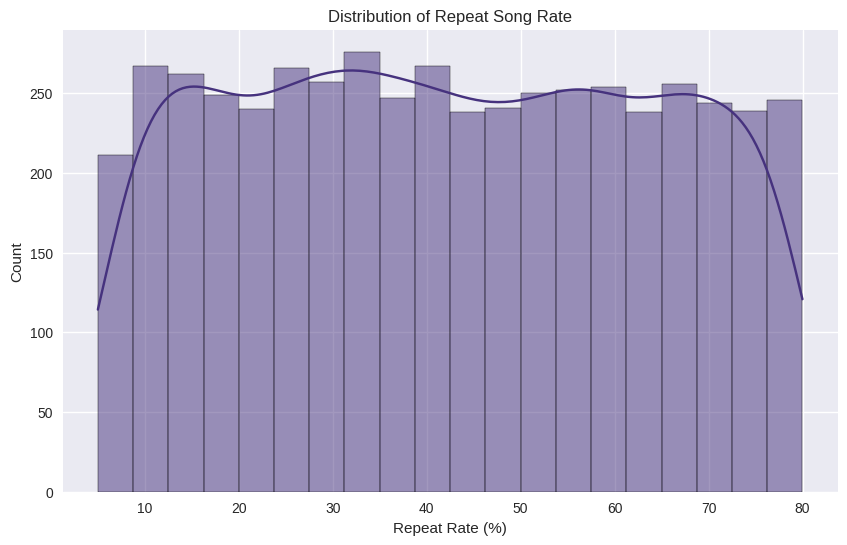

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Repeat Song Rate (%)'], kde=True, bins=20)
plt.title('Distribution of Repeat Song Rate')
plt.xlabel('Repeat Rate (%)')
plt.ylabel('Count')
save_plot('repeat_song_rate_distribution')

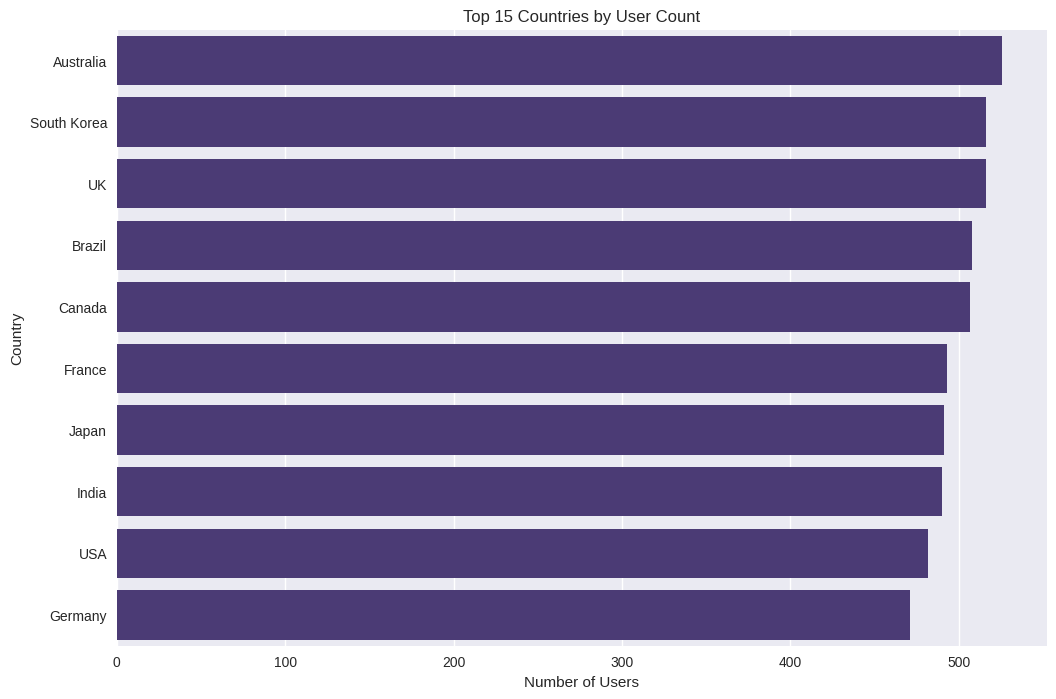

In [ ]:
plt.figure(figsize=(12, 8))
country_counts = df['Country'].value_counts().head(15)  # Top 15 countries
sns.barplot(x=country_counts.values, y=country_counts.index)
plt.title('Top 15 Countries by User Count')
plt.xlabel('Number of Users')
plt.ylabel('Country')
save_plot('top_countries')

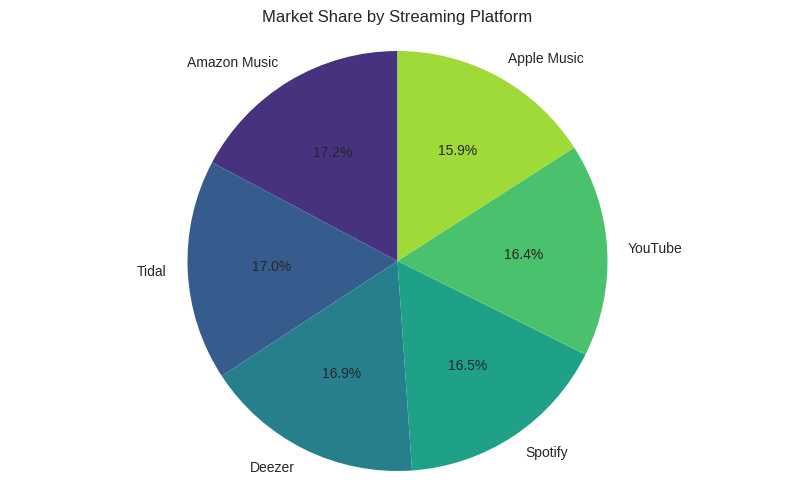

In [ ]:
plt.figure(figsize=(10, 6))
platform_counts = df['Streaming Platform'].value_counts()
plt.pie(platform_counts, labels=platform_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Market Share by Streaming Platform')
save_plot('platform_market_share')

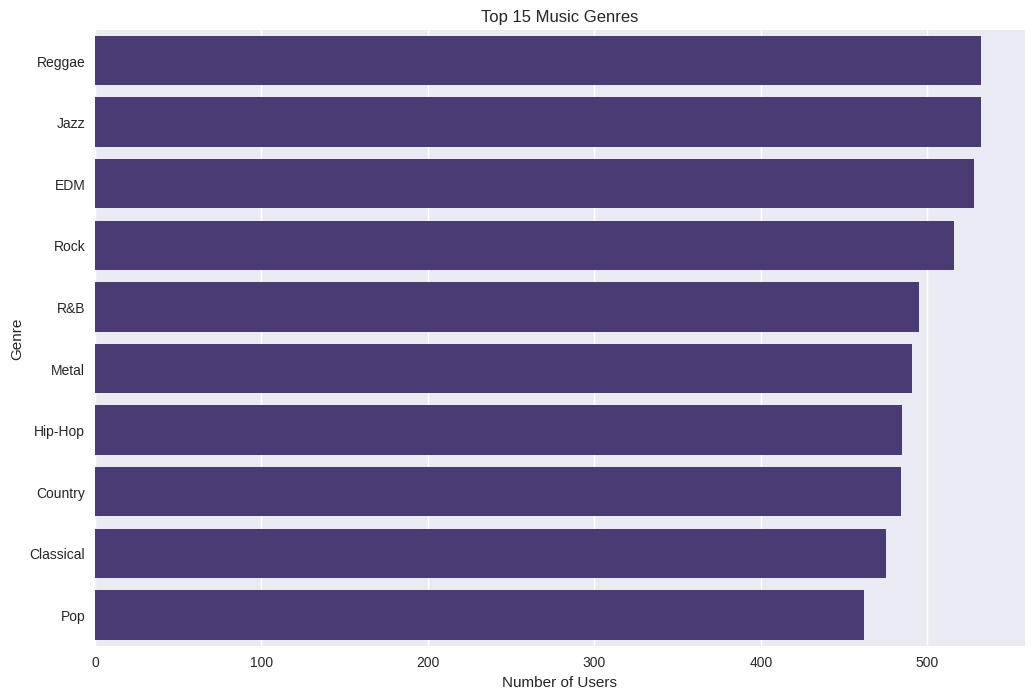

In [ ]:
plt.figure(figsize=(12, 8))
genre_counts = df['Top Genre'].value_counts().head(15)  # Top 15 genres
sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.title('Top 15 Music Genres')
plt.xlabel('Number of Users')
plt.ylabel('Genre')
save_plot('top_genres')

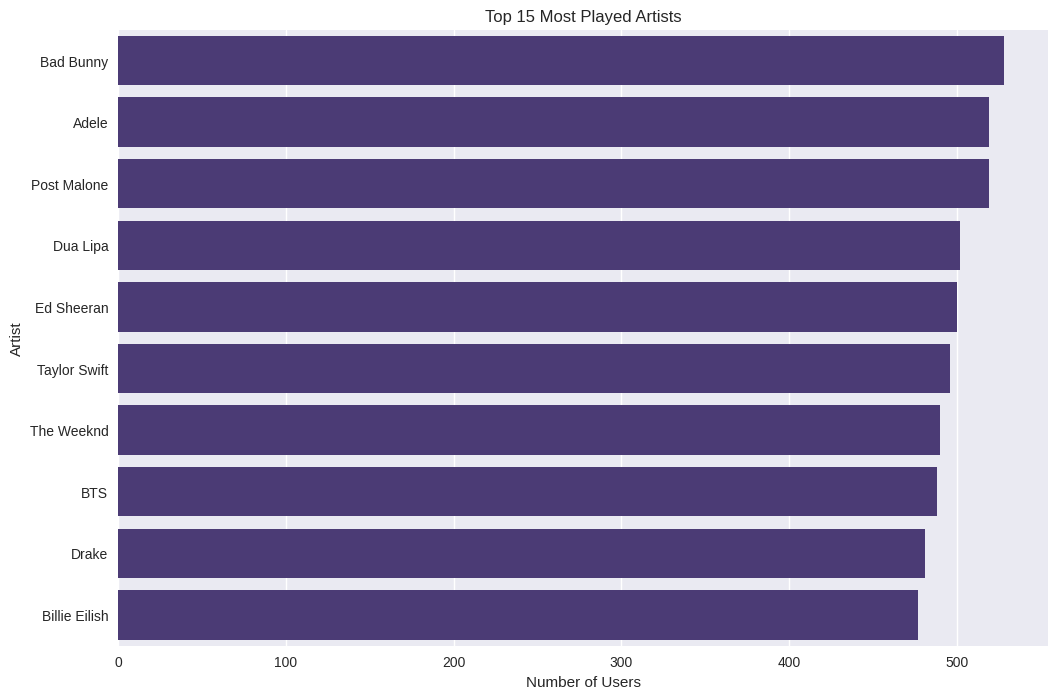

In [ ]:
plt.figure(figsize=(12, 8))
artist_counts = df['Most Played Artist'].value_counts().head(15)  # Top 15 artists
sns.barplot(x=artist_counts.values, y=artist_counts.index)
plt.title('Top 15 Most Played Artists')
plt.xlabel('Number of Users')
plt.ylabel('Artist')
save_plot('top_artists')

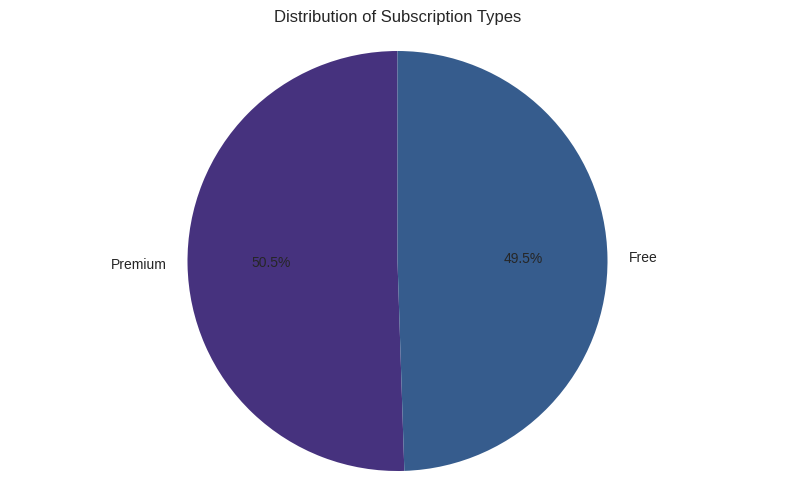

In [ ]:
plt.figure(figsize=(10, 6))
subscription_counts = df['Subscription Type'].value_counts()
plt.pie(subscription_counts, labels=subscription_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribution of Subscription Types')
save_plot('subscription_types')

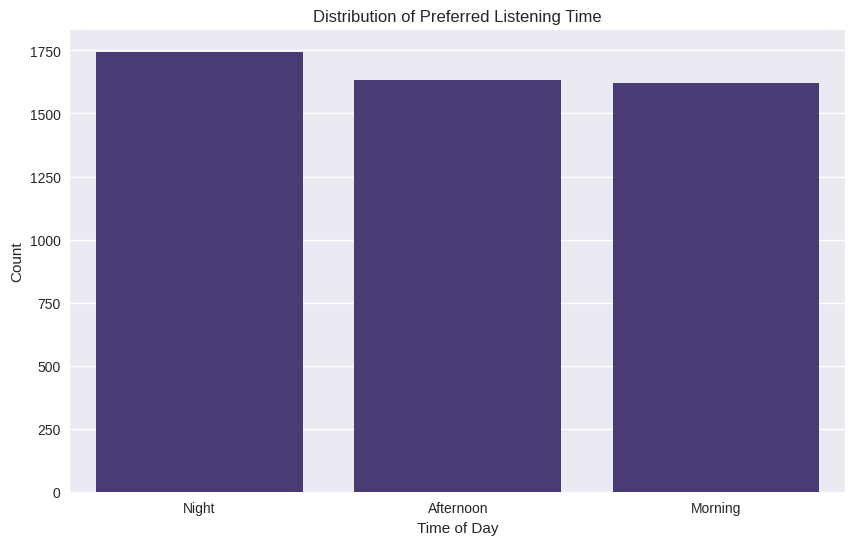

In [ ]:
plt.figure(figsize=(10, 6))
listening_time_counts = df['Listening Time (Morning/Afternoon/Night)'].value_counts()
sns.barplot(x=listening_time_counts.index, y=listening_time_counts.values)
plt.title('Distribution of Preferred Listening Time')
plt.xlabel('Time of Day')
plt.ylabel('Count')
save_plot('listening_time_distribution')


In [ ]:
print(df.columns.tolist())


['User_ID', 'Age', 'Country', 'Streaming Platform', 'Top Genre', 'Minutes Streamed Per Day', 'Number of Songs Liked', 'Most Played Artist', 'Subscription Type', 'Listening Time (Morning/Afternoon/Night)', 'Discover Weekly Engagement (%)', 'Repeat Song Rate (%)', 'Age_Group', 'Streaming_Segment']


# BIVARIATE ANALYSIS

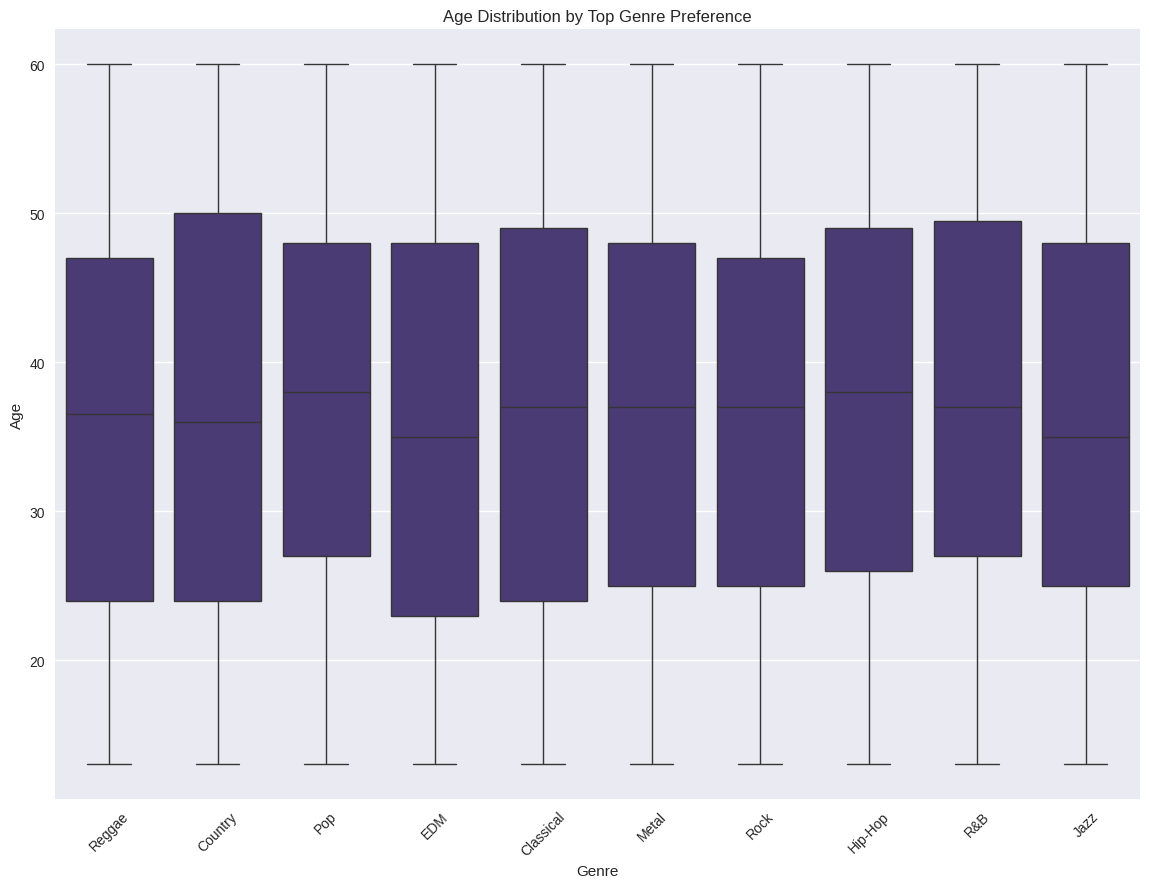

In [ ]:
plt.figure(figsize=(14, 10))
top_genres = df['Top Genre'].value_counts().head(10).index  # Top 10 genres
df_top_genres = df[df['Top Genre'].isin(top_genres)]

sns.boxplot(x='Top Genre', y='Age', data=df_top_genres)
plt.title('Age Distribution by Top Genre Preference')
plt.xlabel('Genre')
plt.ylabel('Age')
plt.xticks(rotation=45)
save_plot('age_by_genre')

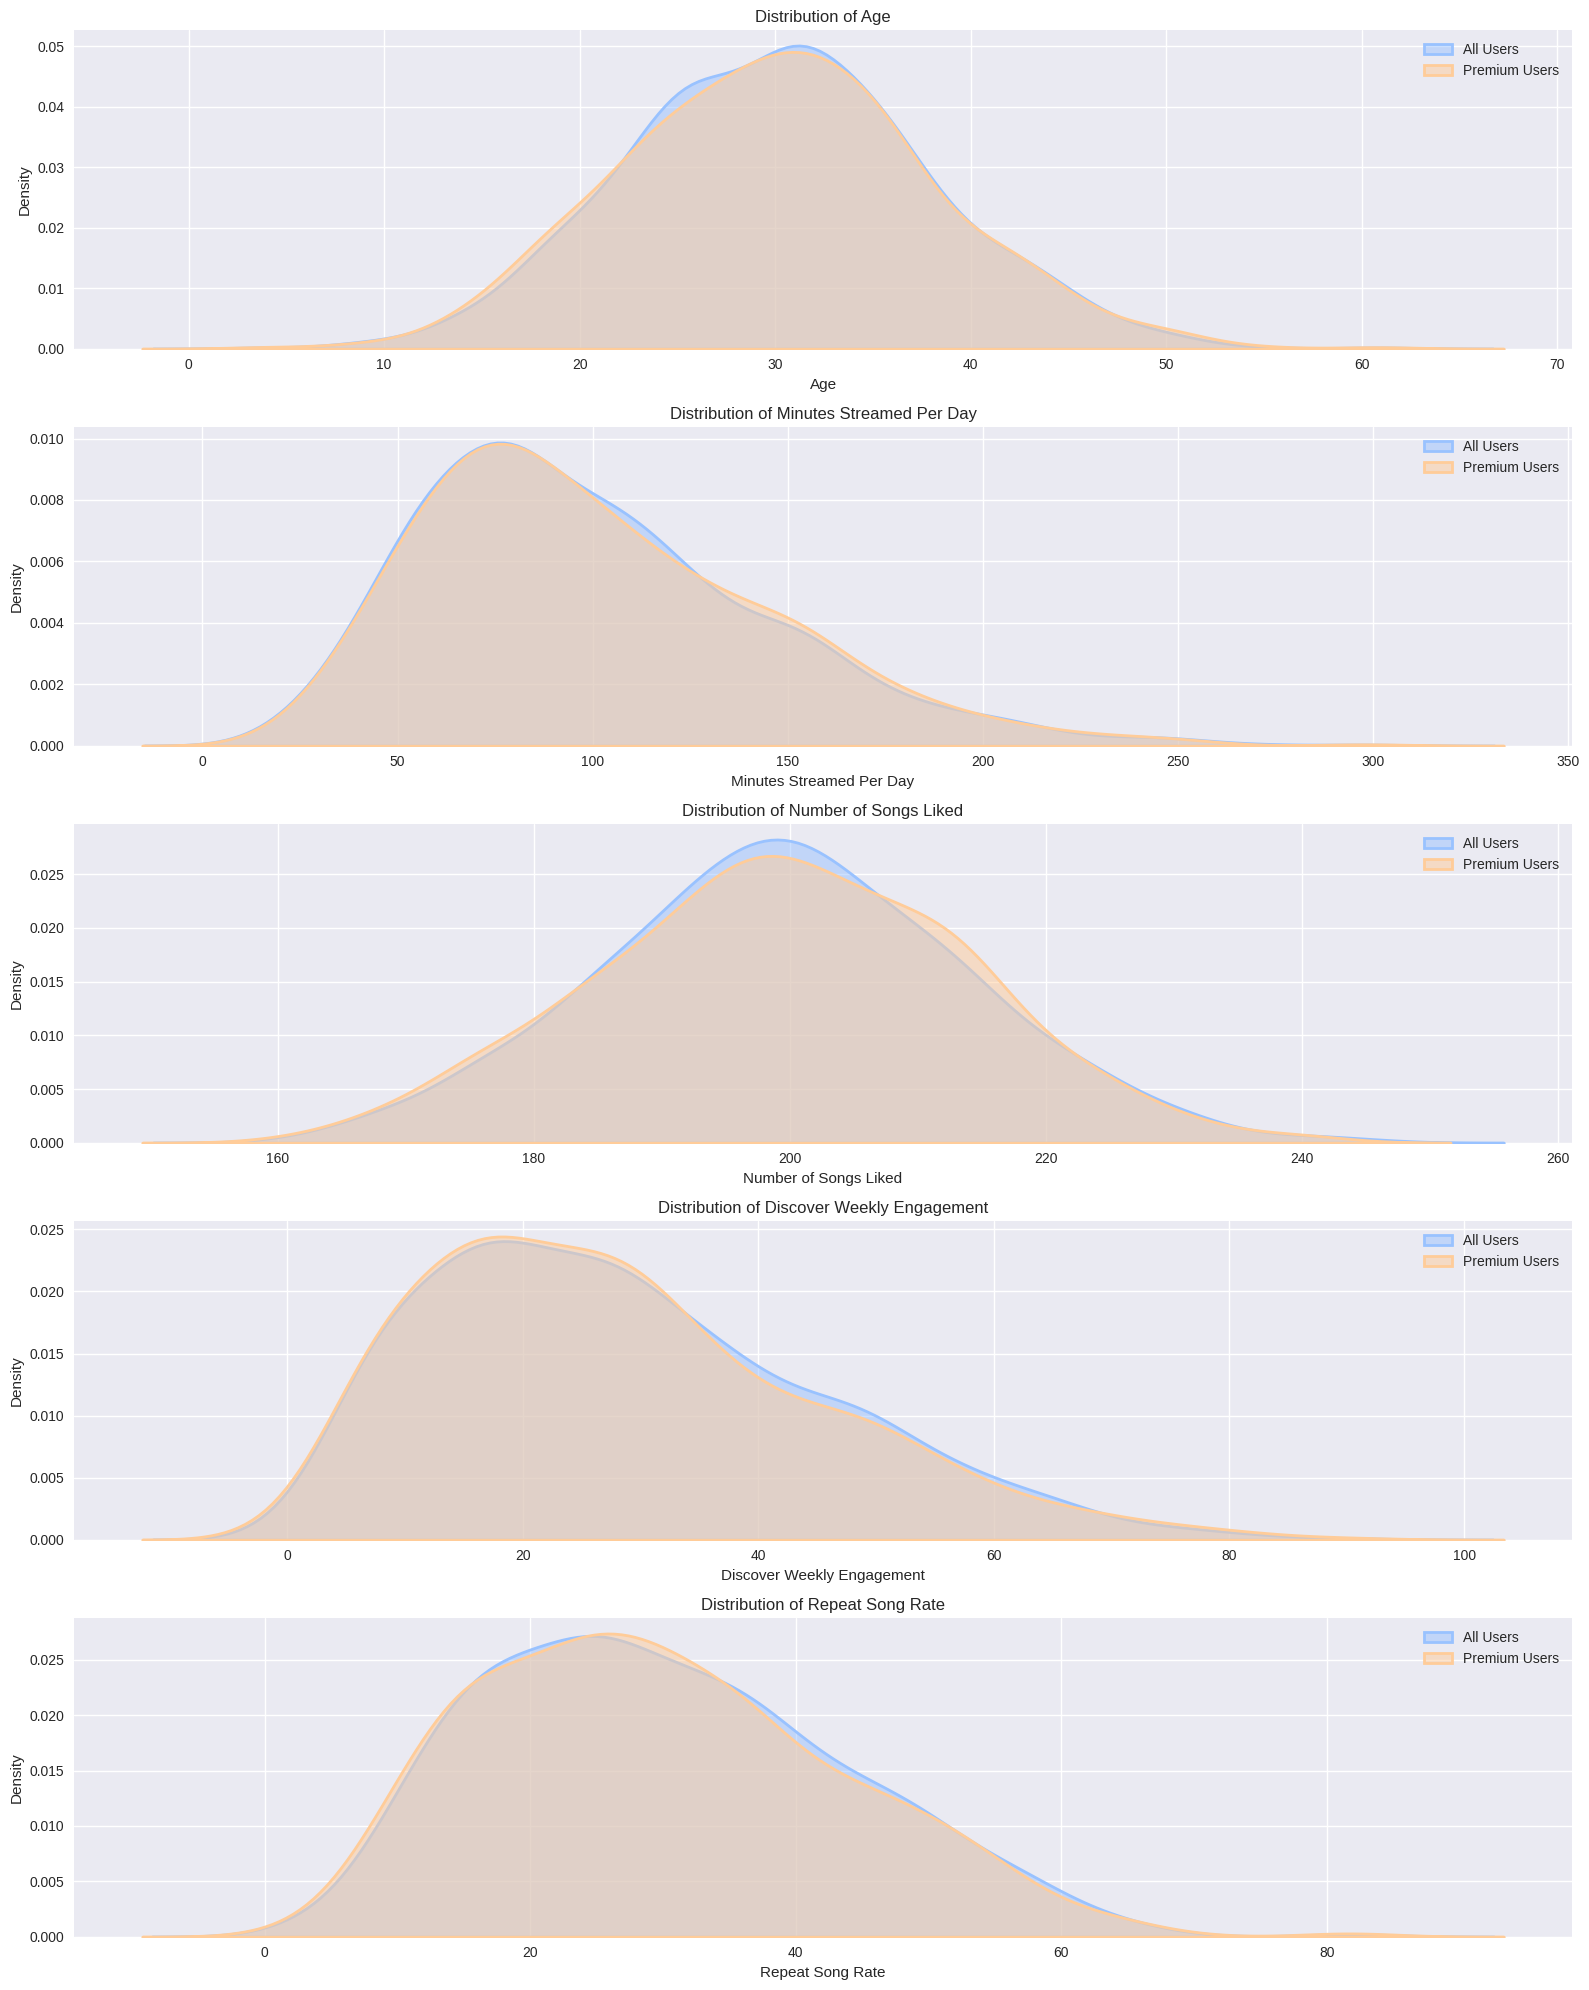

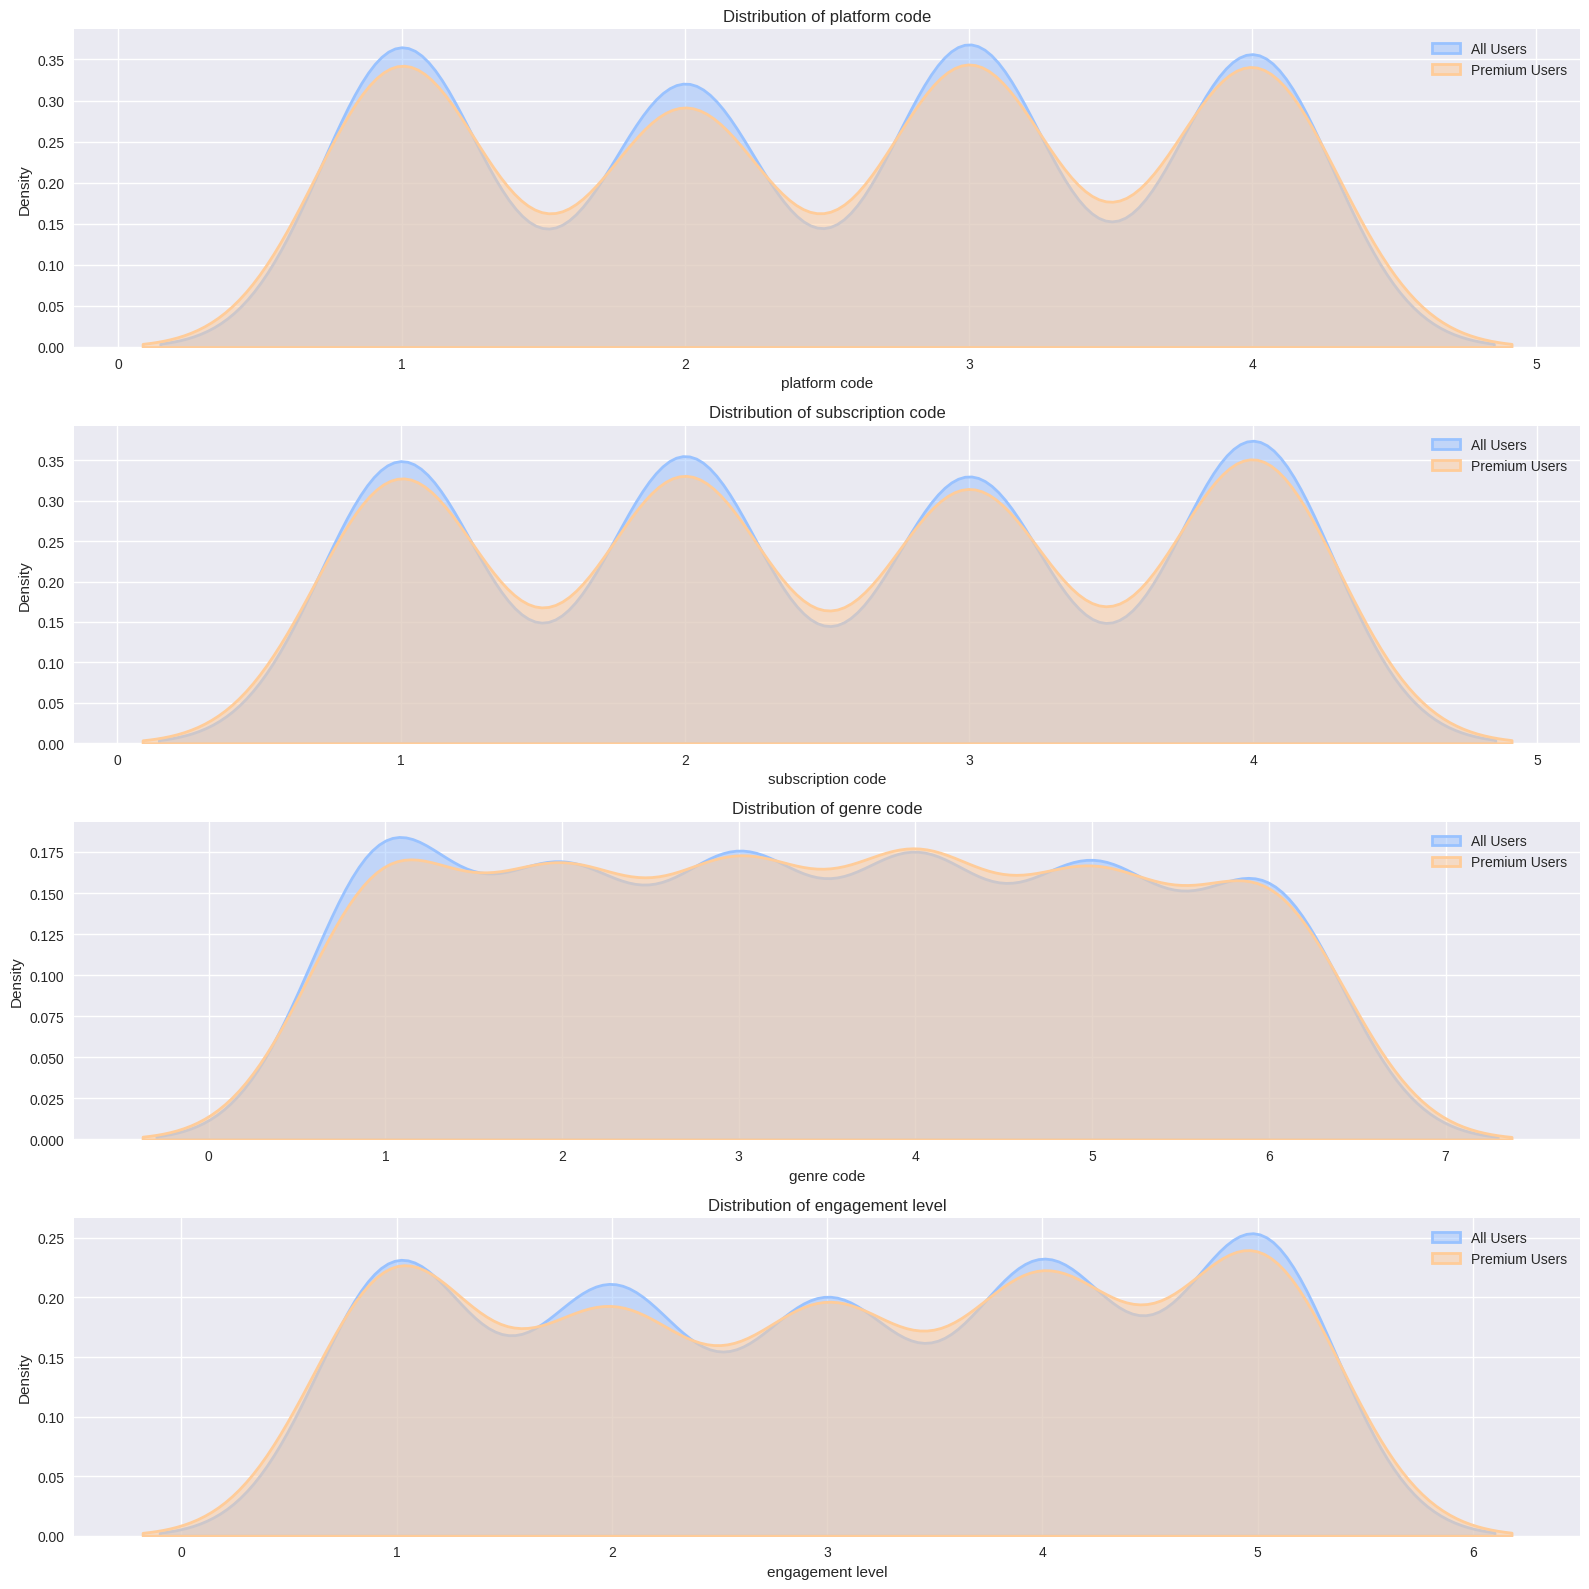

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

# For reproducibility
np.random.seed(42)

# Let's create some sample data based on the columns provided
n_samples = 1000

# Create a DataFrame with the given columns
data = pd.DataFrame({
    'User_ID': range(1, n_samples + 1),
    'Age': np.random.normal(30, 8, n_samples),
    'Country': np.random.choice(['US', 'UK', 'CA', 'AU', 'DE'], n_samples),
    'Streaming_Platform': np.random.choice(['Spotify', 'Apple Music', 'YouTube Music', 'Amazon Music'], n_samples),
    'Top_Genre': np.random.choice(['Pop', 'Rock', 'Hip-Hop', 'Electronic', 'R&B', 'Country'], n_samples),
    'Minutes_Streamed_Per_Day': np.random.gamma(5, 20, n_samples),
    'Number_of_Songs_Liked': np.random.poisson(200, n_samples),
    'Most_Played_Artist': np.random.choice(['Taylor Swift', 'Drake', 'Ed Sheeran', 'BTS', 'The Weeknd'], n_samples),
    'Subscription_Type': np.random.choice(['Free', 'Premium', 'Family', 'Student'], n_samples),
    'Listening_Time': np.random.choice(['Morning', 'Afternoon', 'Night'], n_samples),
    'Discover_Weekly_Engagement': np.random.beta(2, 5, n_samples) * 100,
    'Repeat_Song_Rate': np.random.beta(3, 7, n_samples) * 100,
    'Age_Group': np.random.choice(['18-24', '25-34', '35-44', '45+'], n_samples),
    'Streaming_Segment': np.random.choice(['Casual', 'Regular', 'Power User'], n_samples)
})

# Create a binary category for demonstration (similar to "Clicked Ads" in your example)
data['Premium_User'] = np.random.choice([0, 1], n_samples, p=[0.3, 0.7])

# Define numerical variables to plot
numerical_vars = [
    'Age',
    'Minutes_Streamed_Per_Day',
    'Number_of_Songs_Liked',
    'Discover_Weekly_Engagement',
    'Repeat_Song_Rate'
]

# Set up the plot
plt.figure(figsize=(16, 20))
plt.subplots_adjust(hspace=0.4)

# Define colors
colors = ['#99c2ff', '#ffcc99']  # Light blue for all users, light orange for premium users

# Create KDE plots for each numerical variable
for i, var in enumerate(numerical_vars):
    plt.subplot(len(numerical_vars), 1, i+1)

    # Plot KDE for all users
    sns.kdeplot(data=data, x=var, fill=True, common_norm=False,
                alpha=0.5, linewidth=2, label='All Users', color=colors[0])

    # Plot KDE for premium users
    sns.kdeplot(data=data[data['Premium_User'] == 1], x=var, fill=True,
                common_norm=False, alpha=0.5, linewidth=2,
                label='Premium Users', color=colors[1])

    plt.title(f'Distribution of {var.replace("_", " ")}')
    plt.xlabel(var.replace("_", " "))
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()

# Now let's create another set of plots for categorical variables with numerical encodings
# This will simulate the categorical variables in your example (like gender, net_type)

# Create numerically encoded categorical variables
categorical_numeric = pd.DataFrame({
    'platform_code': data['Streaming_Platform'].map({
        'Spotify': 1, 'Apple Music': 2, 'YouTube Music': 3, 'Amazon Music': 4
    }),
    'subscription_code': data['Subscription_Type'].map({
        'Free': 1, 'Premium': 2, 'Family': 3, 'Student': 4
    }),
    'genre_code': data['Top_Genre'].map({
        'Pop': 1, 'Rock': 2, 'Hip-Hop': 3, 'Electronic': 4, 'R&B': 5, 'Country': 6
    }),
    'engagement_level': np.random.choice([1, 2, 3, 4, 5], n_samples),  # 1-5 scale
    'Premium_User': data['Premium_User']
})

categorical_vars = [
    'platform_code',
    'subscription_code',
    'genre_code',
    'engagement_level'
]

# Create KDE plots for categorical numeric variables
plt.figure(figsize=(16, 16))
plt.subplots_adjust(hspace=0.4)

for i, var in enumerate(categorical_vars):
    plt.subplot(len(categorical_vars), 1, i+1)

    # Plot KDE for all users
    sns.kdeplot(data=categorical_numeric, x=var, fill=True, common_norm=False,
                alpha=0.5, linewidth=2, label='All Users', color=colors[0])

    # Plot KDE for premium users
    sns.kdeplot(data=categorical_numeric[categorical_numeric['Premium_User'] == 1],
                x=var, fill=True, common_norm=False, alpha=0.5, linewidth=2,
                label='Premium Users', color=colors[1])

    plt.title(f'Distribution of {var.replace("_", " ")}')
    plt.xlabel(var.replace("_", " "))
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()

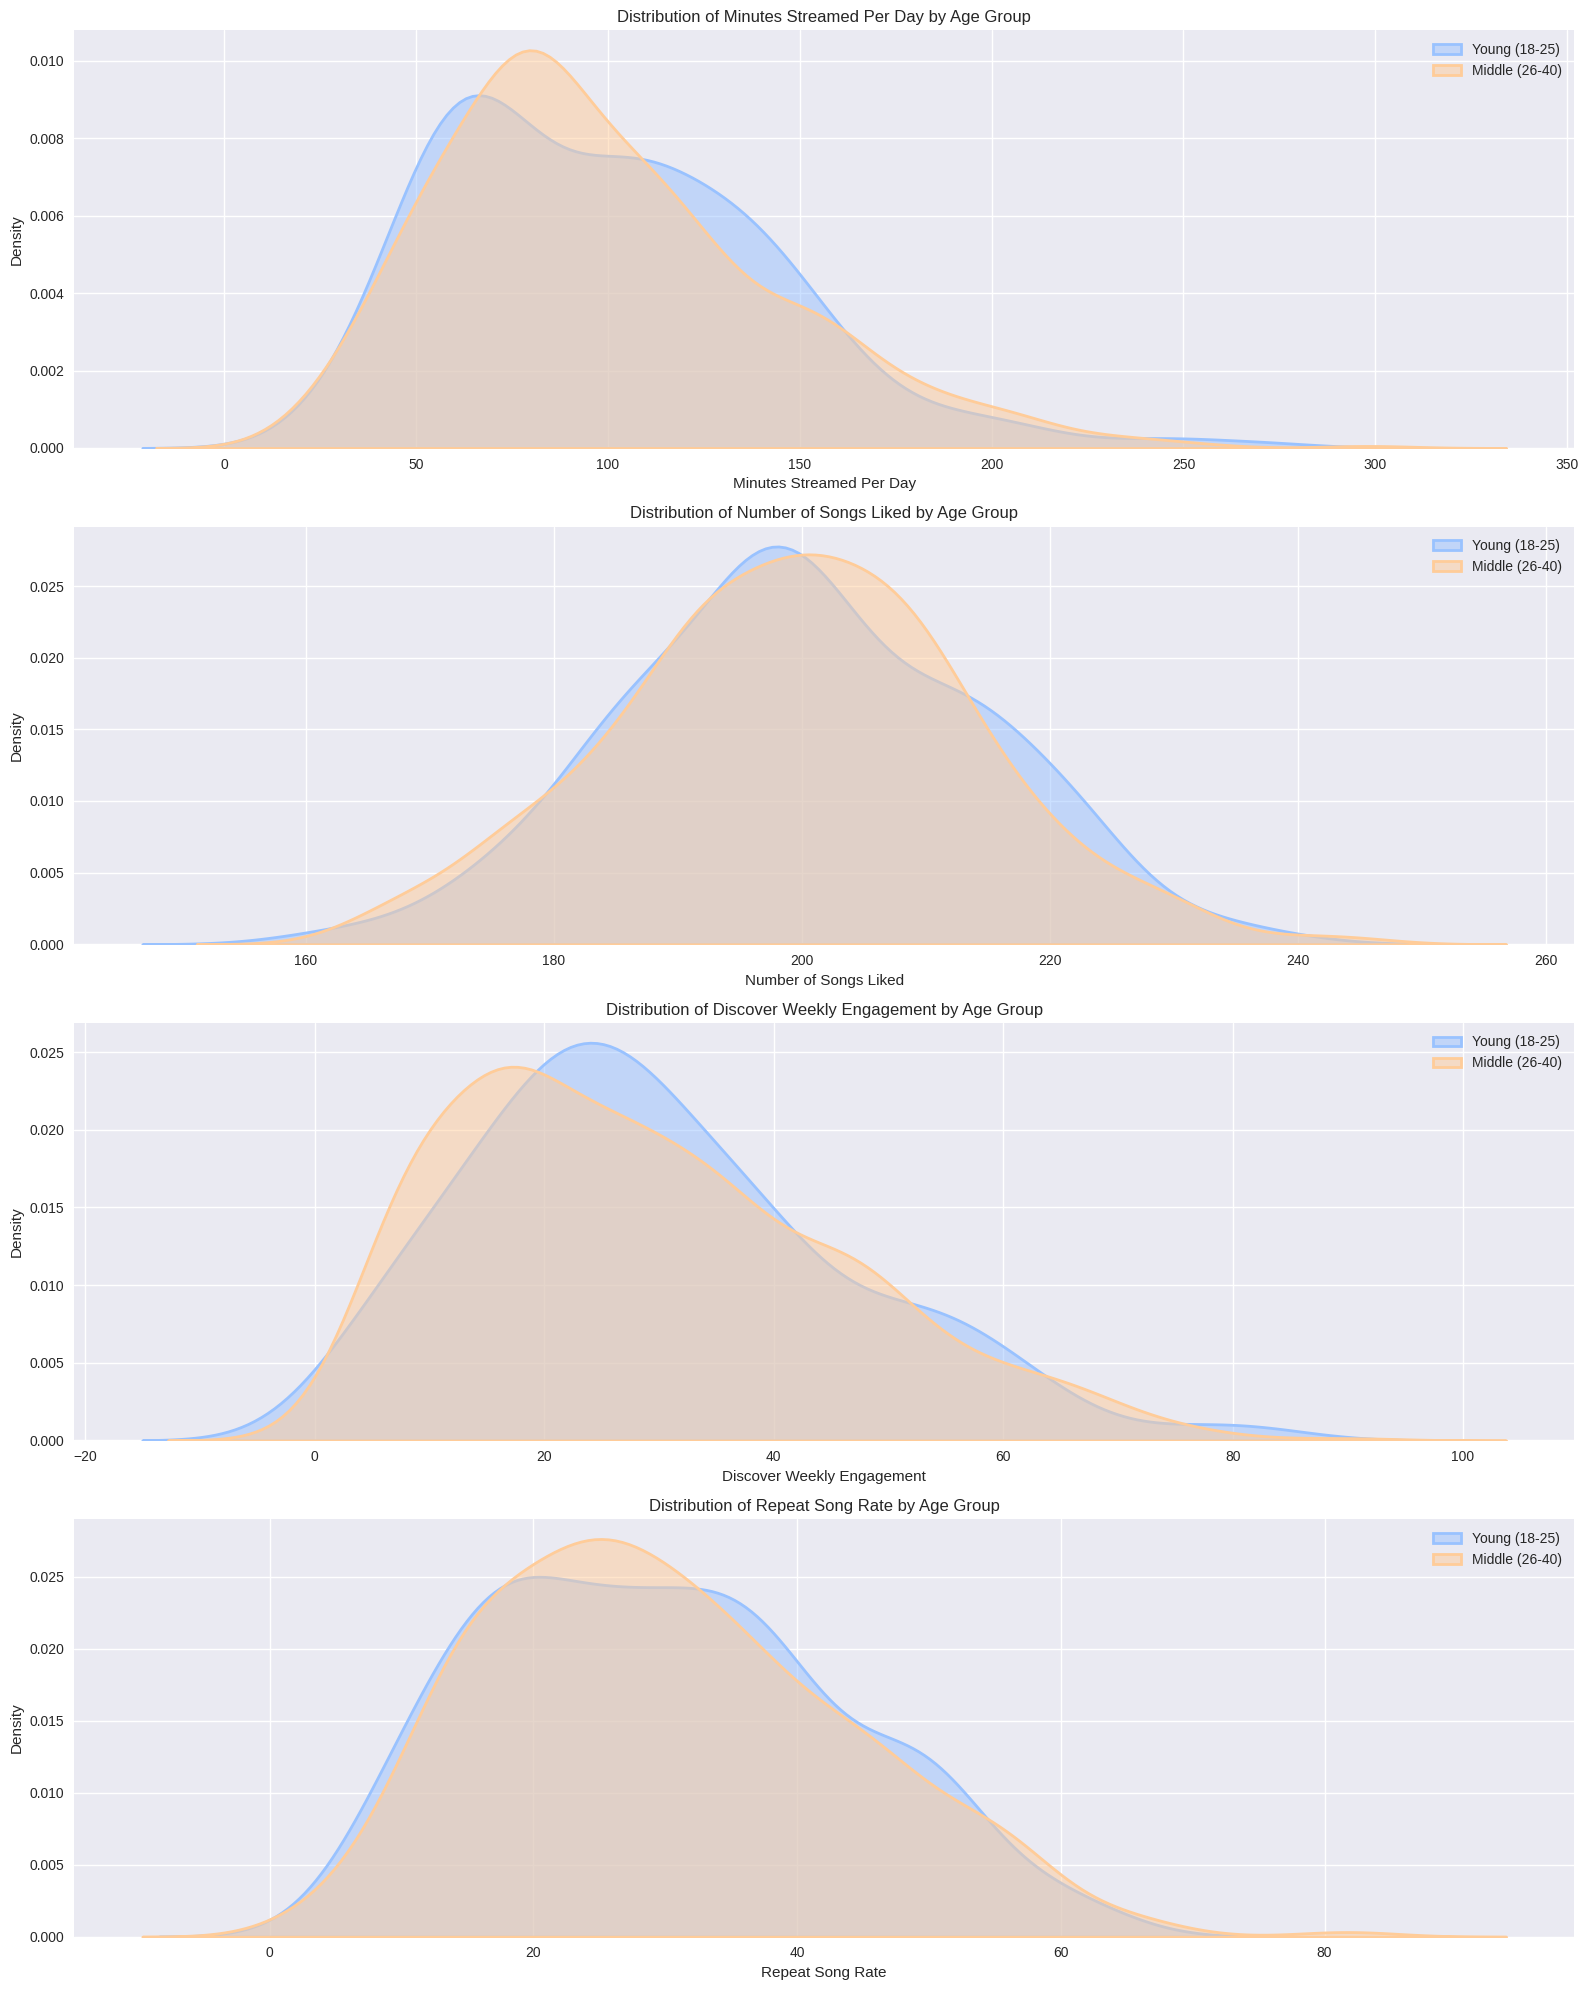

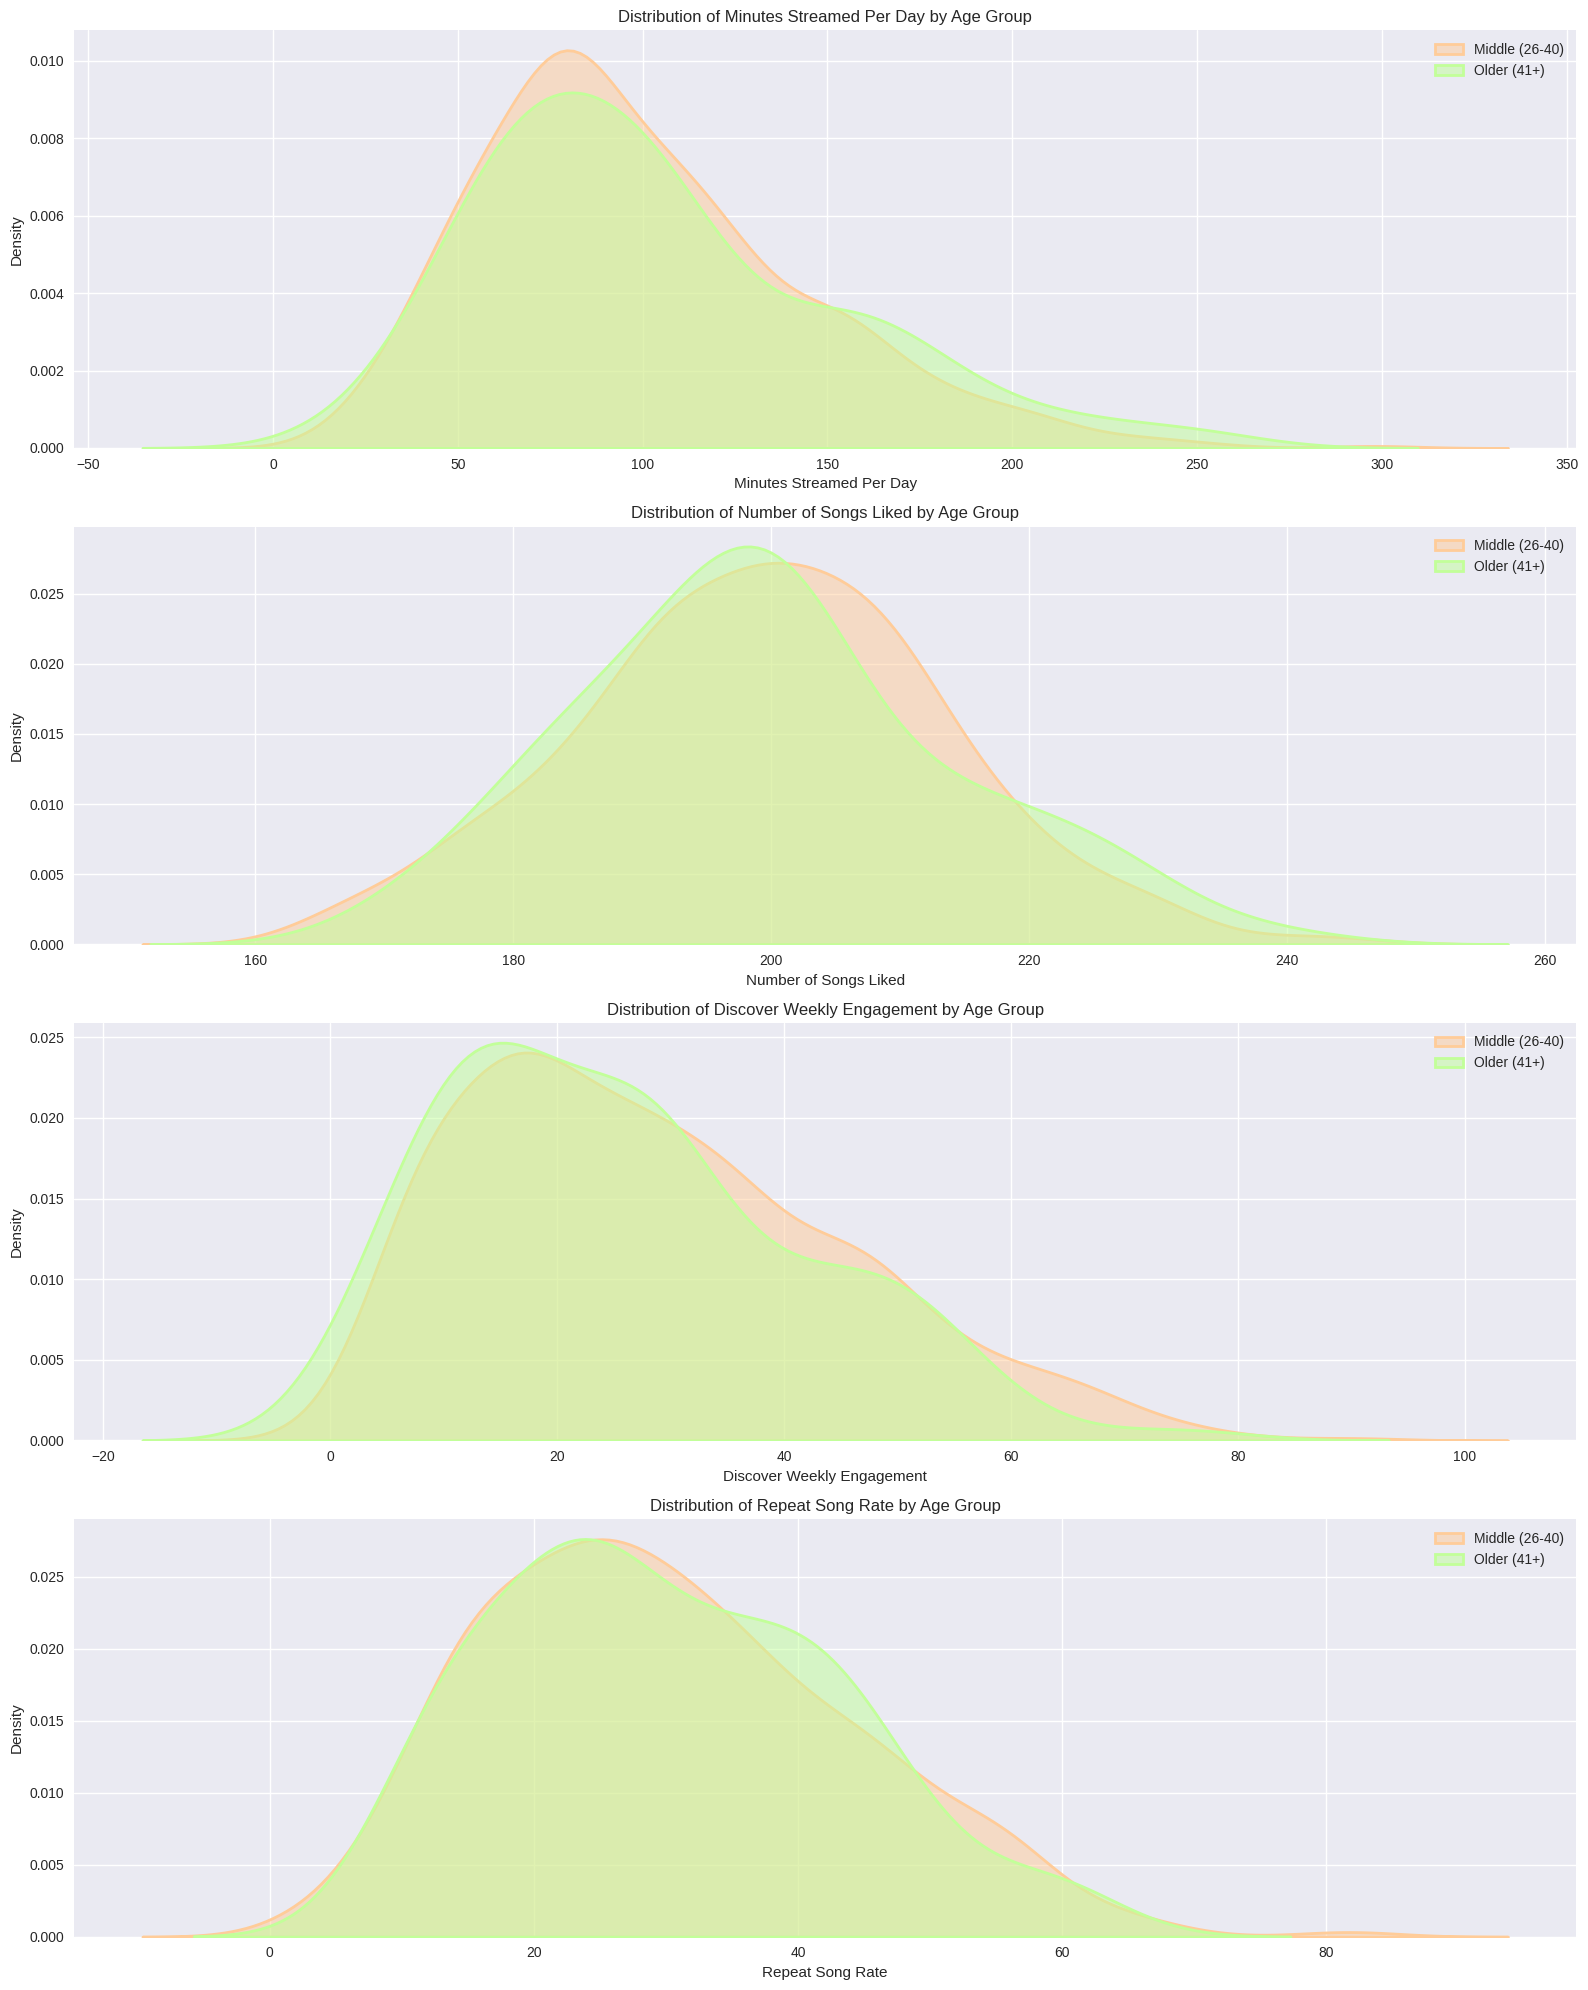

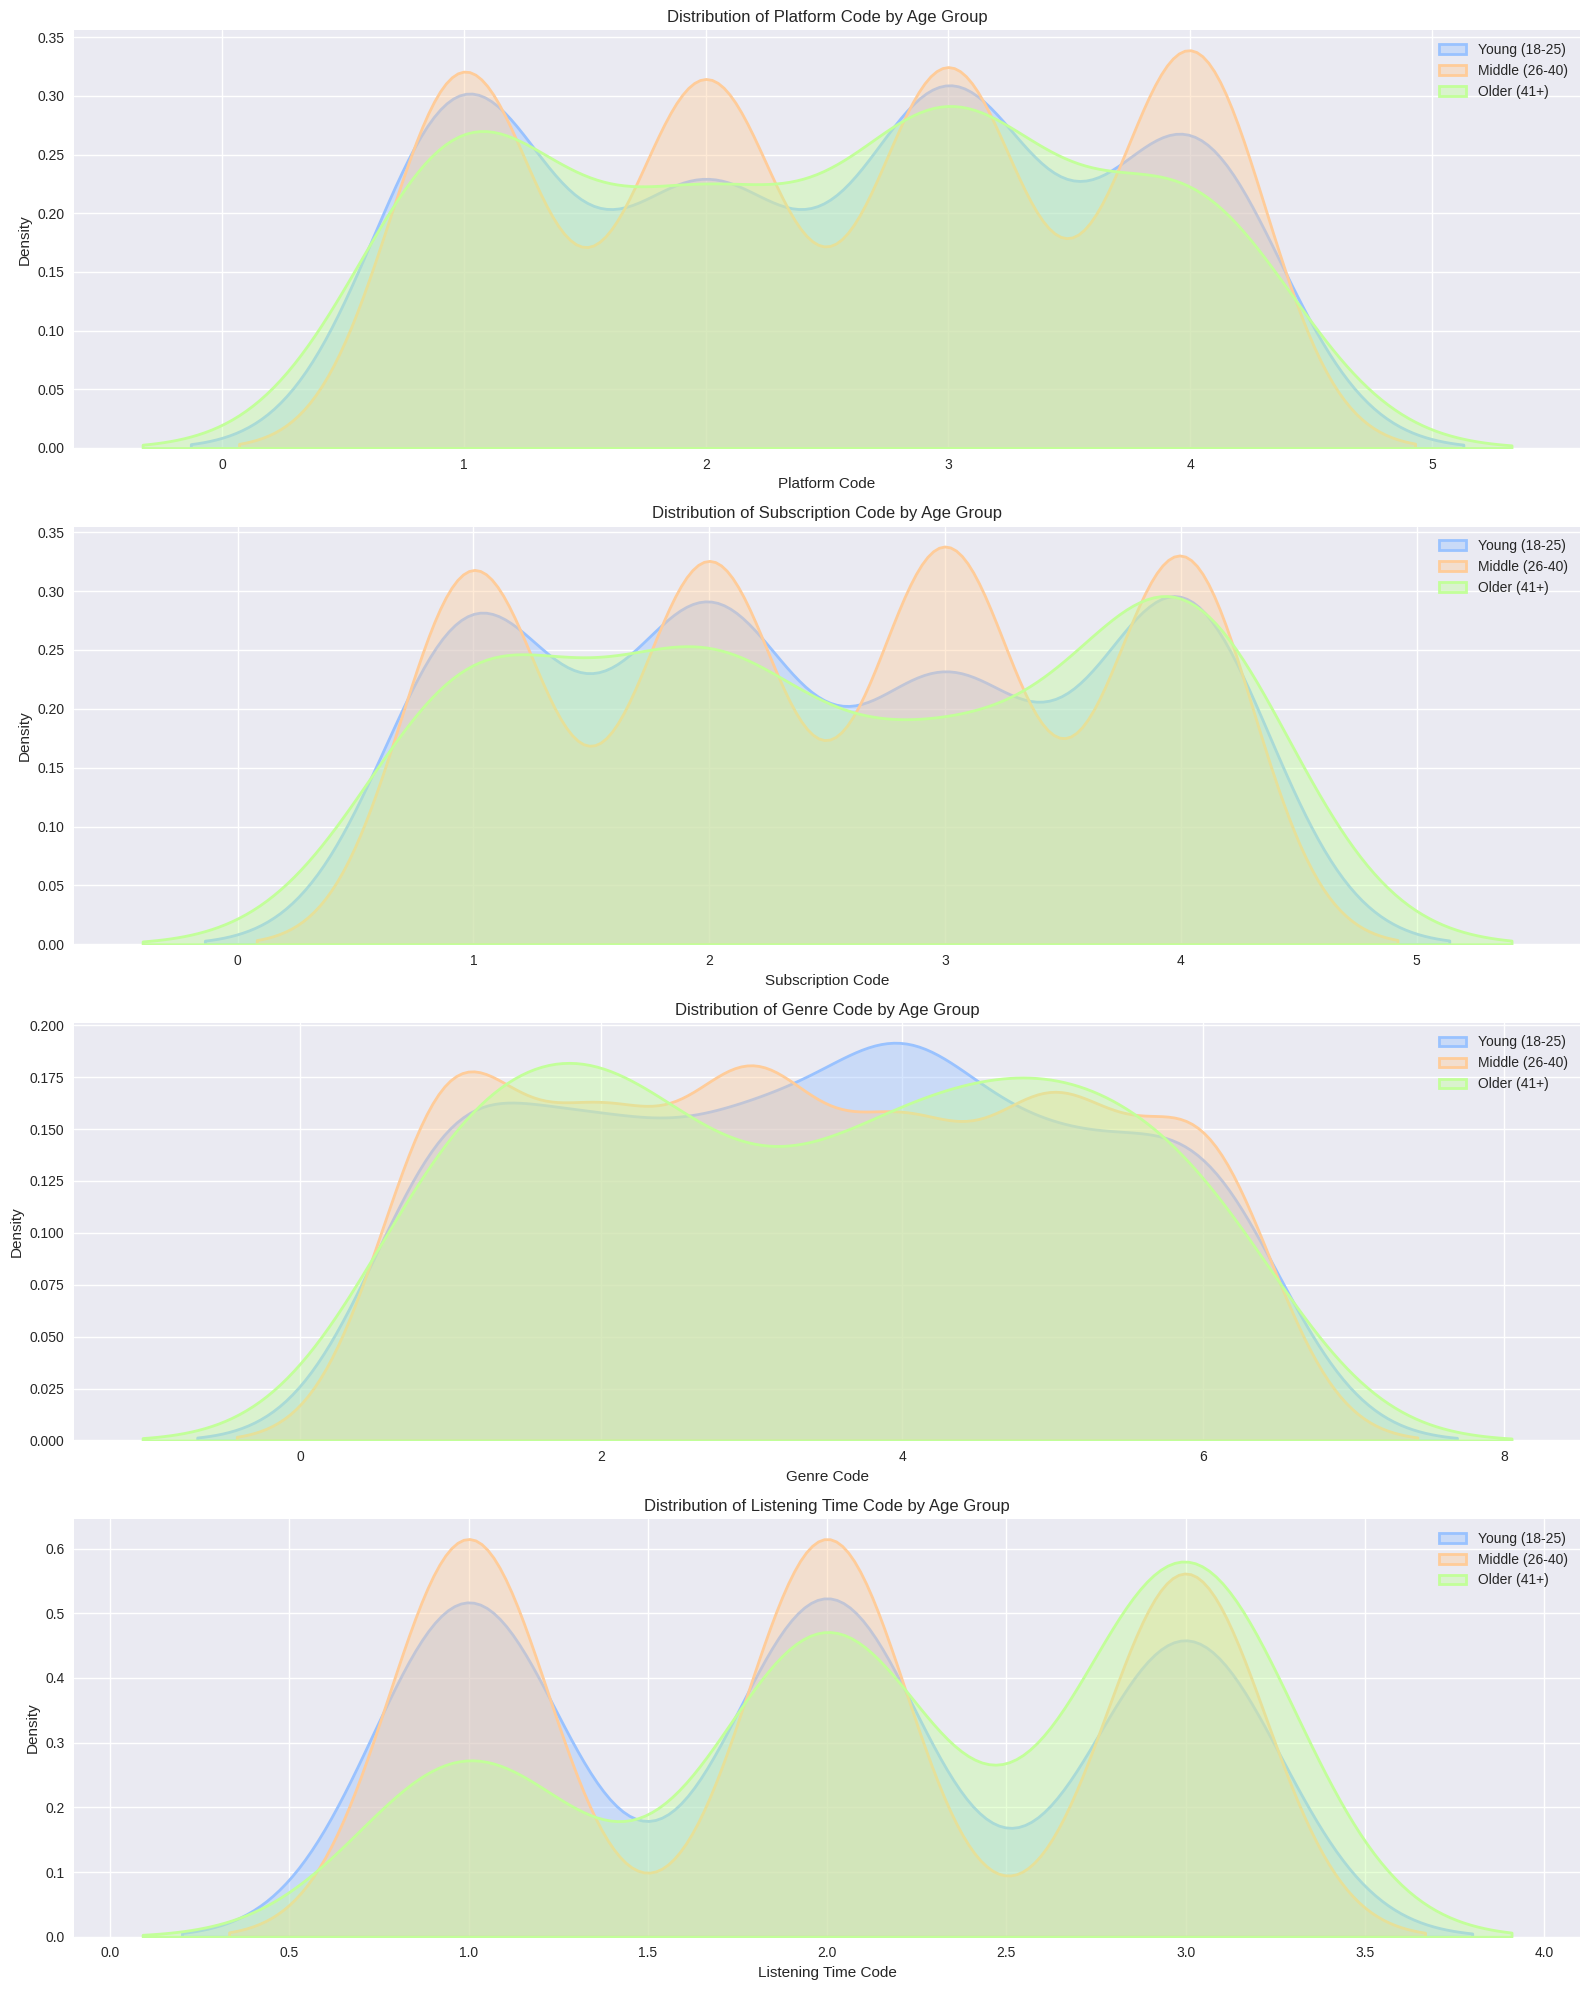

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

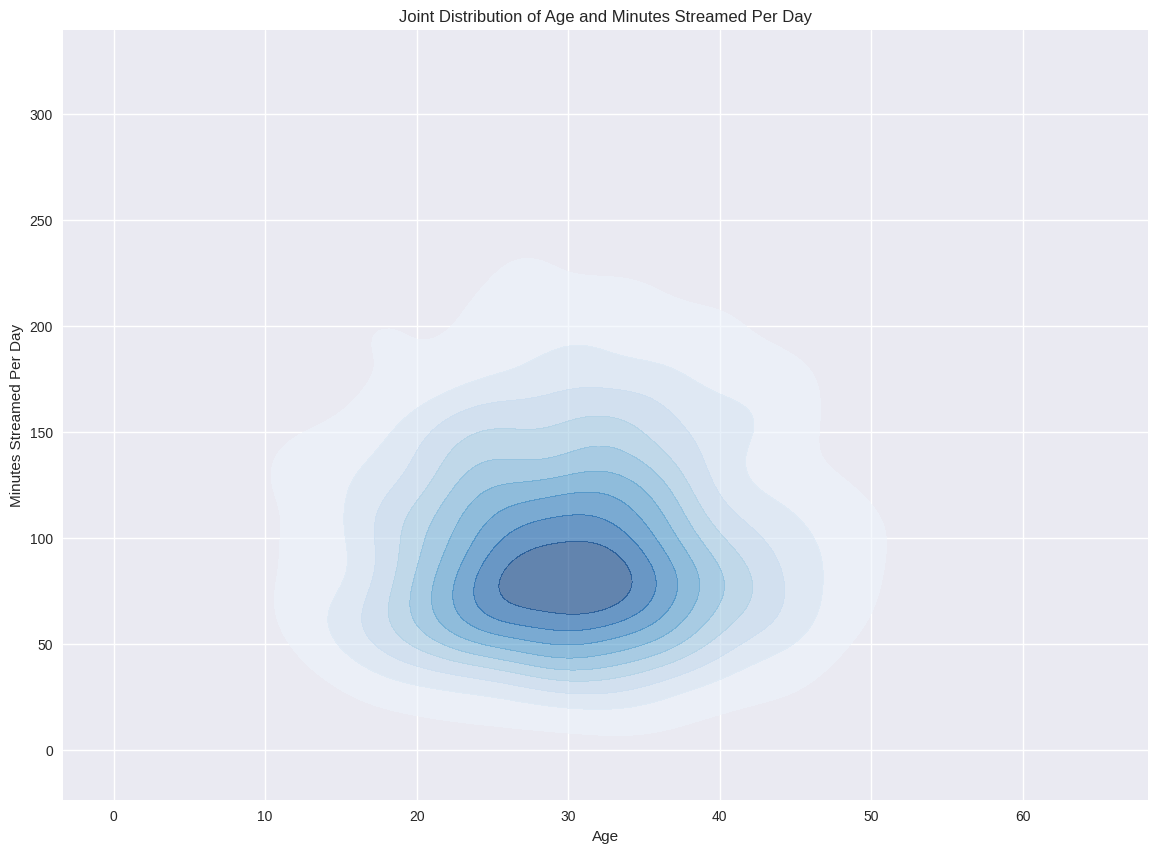

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For reproducibility
np.random.seed(42)

# Create sample data
n_samples = 1000

# Create a DataFrame with the given columns
data = pd.DataFrame({
    'User_ID': range(1, n_samples + 1),
    'Age': np.random.normal(30, 8, n_samples),
    'Country': np.random.choice(['US', 'UK', 'CA', 'AU', 'DE'], n_samples),
    'Streaming_Platform': np.random.choice(['Spotify', 'Apple Music', 'YouTube Music', 'Amazon Music'], n_samples),
    'Top_Genre': np.random.choice(['Pop', 'Rock', 'Hip-Hop', 'Electronic', 'R&B', 'Country'], n_samples),
    'Minutes_Streamed_Per_Day': np.random.gamma(5, 20, n_samples),
    'Number_of_Songs_Liked': np.random.poisson(200, n_samples),
    'Most_Played_Artist': np.random.choice(['Taylor Swift', 'Drake', 'Ed Sheeran', 'BTS', 'The Weeknd'], n_samples),
    'Subscription_Type': np.random.choice(['Free', 'Premium', 'Family', 'Student'], n_samples),
    'Listening_Time': np.random.choice(['Morning', 'Afternoon', 'Night'], n_samples),
    'Discover_Weekly_Engagement': np.random.beta(2, 5, n_samples) * 100,
    'Repeat_Song_Rate': np.random.beta(3, 7, n_samples) * 100
})

# Create age groups
bins = [0, 25, 40, 100]
labels = ['Young (18-25)', 'Middle (26-40)', 'Older (41+)']
data['Age_Group'] = pd.cut(data['Age'], bins=bins, labels=labels)

# Define variables to plot against age groups
variables = [
    'Minutes_Streamed_Per_Day',
    'Number_of_Songs_Liked',
    'Discover_Weekly_Engagement',
    'Repeat_Song_Rate'
]

# Color mapping for age groups
colors = {
    'Young (18-25)': '#99c2ff',    # Light blue
    'Middle (26-40)': '#ffcc99',   # Light orange
    'Older (41+)': '#c2ff99'       # Light green
}

# Create KDE plots for each variable comparing Young vs Middle age groups
plt.figure(figsize=(16, 20))
plt.subplots_adjust(hspace=0.4)

for i, var in enumerate(variables):
    plt.subplot(len(variables), 1, i+1)

    # Plot KDE for young users
    sns.kdeplot(data=data[data['Age_Group'] == 'Young (18-25)'], x=var,
                fill=True, common_norm=False, alpha=0.5, linewidth=2,
                label='Young (18-25)', color=colors['Young (18-25)'])

    # Plot KDE for middle-aged users
    sns.kdeplot(data=data[data['Age_Group'] == 'Middle (26-40)'], x=var,
                fill=True, common_norm=False, alpha=0.5, linewidth=2,
                label='Middle (26-40)', color=colors['Middle (26-40)'])

    plt.title(f'Distribution of {var.replace("_", " ")} by Age Group')
    plt.xlabel(var.replace("_", " "))
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()

# Create another set with Middle vs Older age groups
plt.figure(figsize=(16, 20))
plt.subplots_adjust(hspace=0.4)

for i, var in enumerate(variables):
    plt.subplot(len(variables), 1, i+1)

    # Plot KDE for middle-aged users
    sns.kdeplot(data=data[data['Age_Group'] == 'Middle (26-40)'], x=var,
                fill=True, common_norm=False, alpha=0.5, linewidth=2,
                label='Middle (26-40)', color=colors['Middle (26-40)'])

    # Plot KDE for older users
    sns.kdeplot(data=data[data['Age_Group'] == 'Older (41+)'], x=var,
                fill=True, common_norm=False, alpha=0.5, linewidth=2,
                label='Older (41+)', color=colors['Older (41+)'])

    plt.title(f'Distribution of {var.replace("_", " ")} by Age Group')
    plt.xlabel(var.replace("_", " "))
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()

# Create KDE plots for categorical variables that have been numerically encoded
platform_map = {'Spotify': 1, 'Apple Music': 2, 'YouTube Music': 3, 'Amazon Music': 4}
subscription_map = {'Free': 1, 'Premium': 2, 'Family': 3, 'Student': 4}
genre_map = {'Pop': 1, 'Rock': 2, 'Hip-Hop': 3, 'Electronic': 4, 'R&B': 5, 'Country': 6}
listening_time_map = {'Morning': 1, 'Afternoon': 2, 'Night': 3}

data['Platform_Code'] = data['Streaming_Platform'].map(platform_map)
data['Subscription_Code'] = data['Subscription_Type'].map(subscription_map)
data['Genre_Code'] = data['Top_Genre'].map(genre_map)
data['Listening_Time_Code'] = data['Listening_Time'].map(listening_time_map)

categorical_vars = [
    'Platform_Code',
    'Subscription_Code',
    'Genre_Code',
    'Listening_Time_Code'
]

# Create KDE plots for categorical variables comparing all three age groups
plt.figure(figsize=(16, 20))
plt.subplots_adjust(hspace=0.4)

for i, var in enumerate(categorical_vars):
    plt.subplot(len(categorical_vars), 1, i+1)

    # Plot KDE for each age group
    for age_group in labels:
        sns.kdeplot(data=data[data['Age_Group'] == age_group], x=var,
                    fill=True, common_norm=False, alpha=0.4, linewidth=2,
                    label=age_group, color=colors[age_group])

    plt.title(f'Distribution of {var.replace("_", " ")} by Age Group')
    plt.xlabel(var.replace("_", " "))
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()

# Finally, create combined plot for Age distribution against one key metric
plt.figure(figsize=(14, 10))

# Set up colors for age groups
age_palette = sns.color_palette("husl", 3)

# Plot KDE for Age and Minutes Streamed
sns.kdeplot(data=data, x='Age', y='Minutes_Streamed_Per_Day',
            fill=True, cmap="Blues", thresh=0.05,
            levels=10, alpha=0.6)

plt.title('Joint Distribution of Age and Minutes Streamed Per Day')
plt.xlabel('Age')
plt.ylabel('Minutes Streamed Per Day')
plt.colorbar(label='Density')

plt.tight_layout()
plt.show()

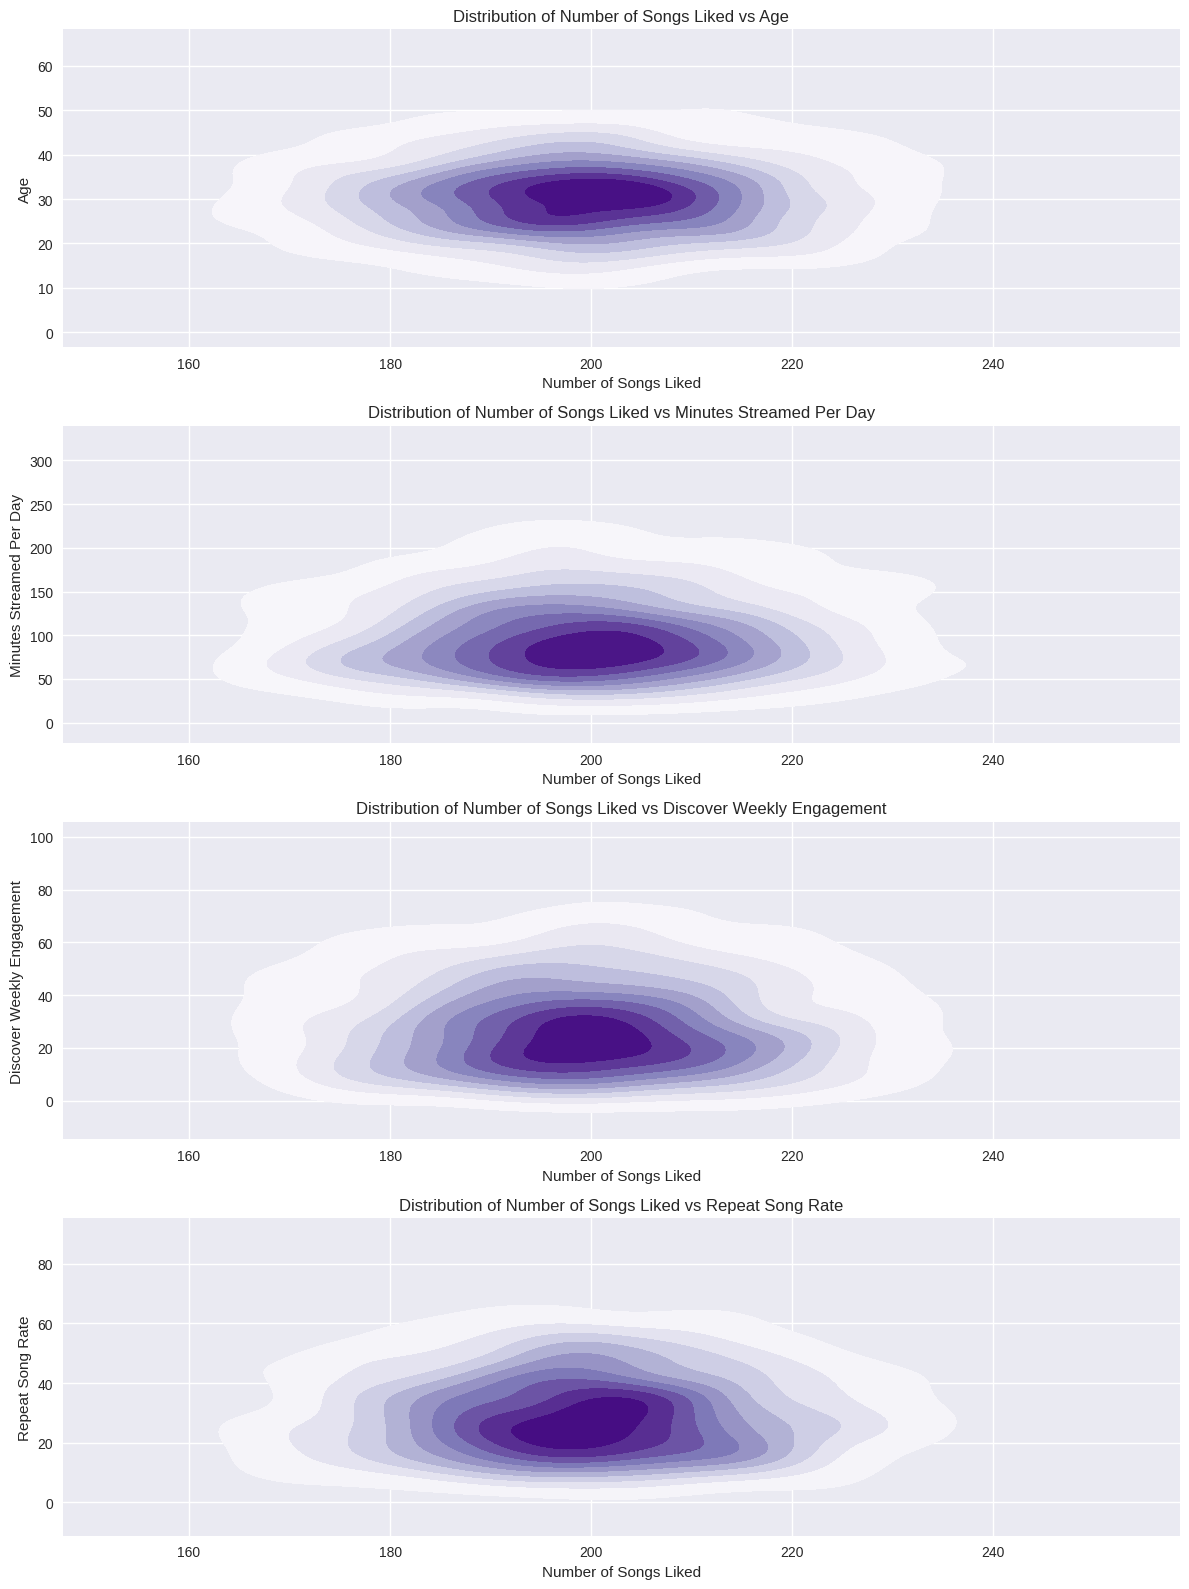

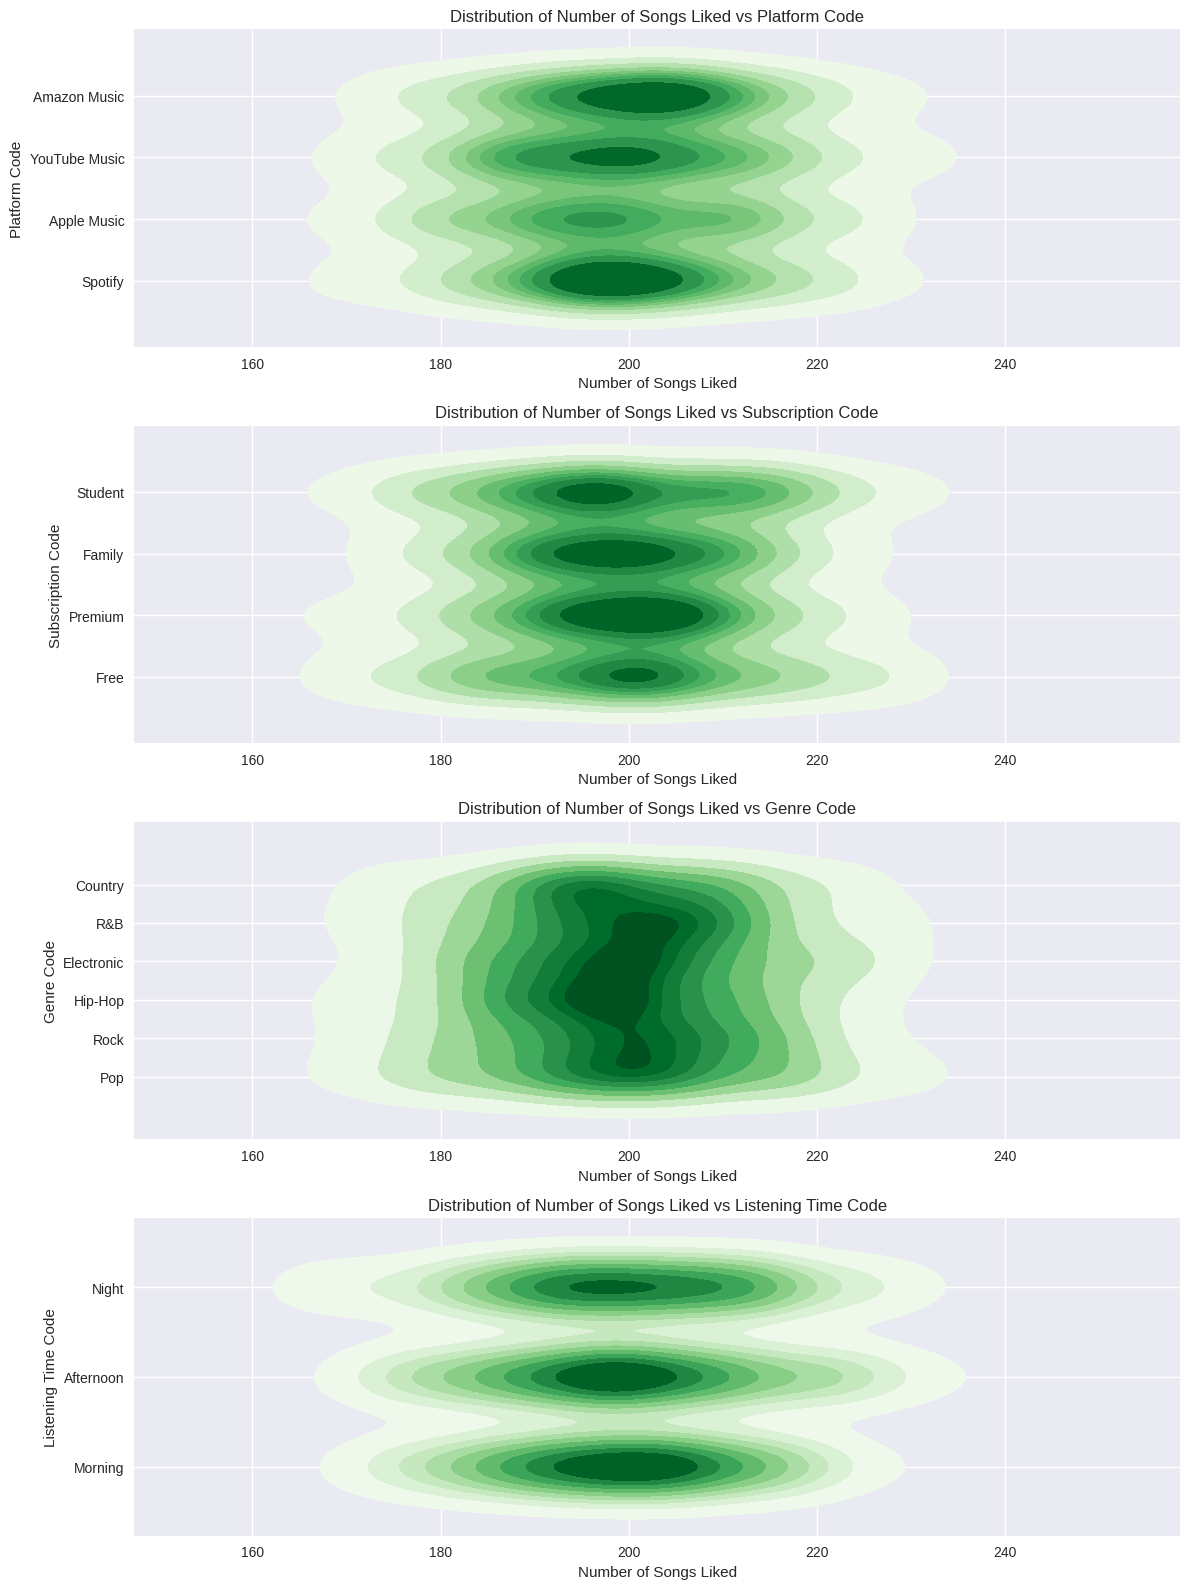

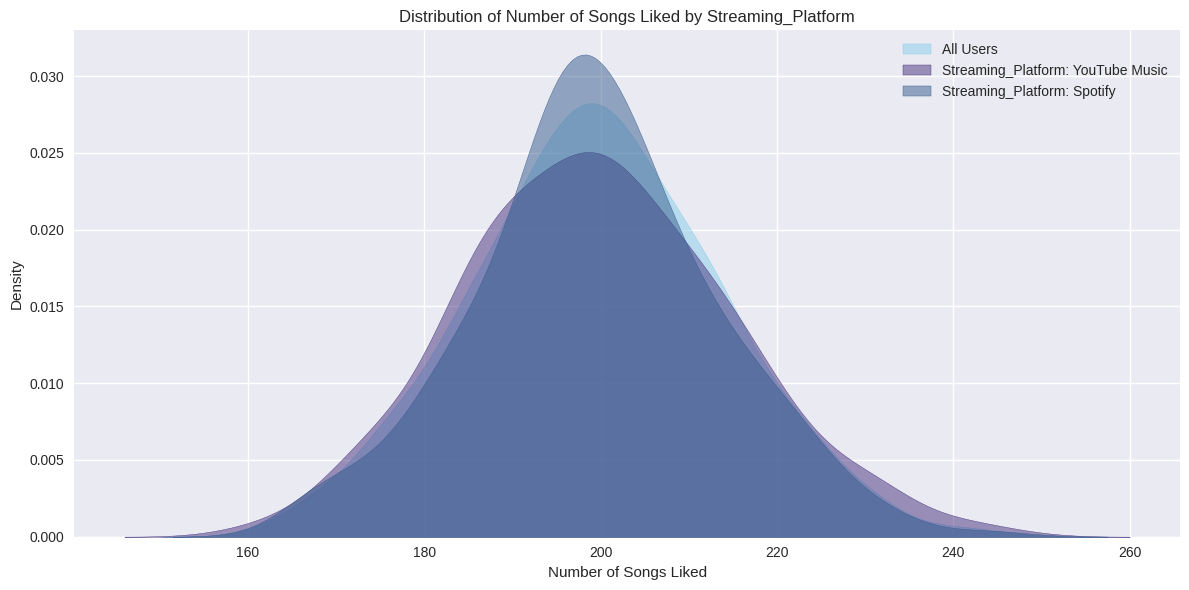

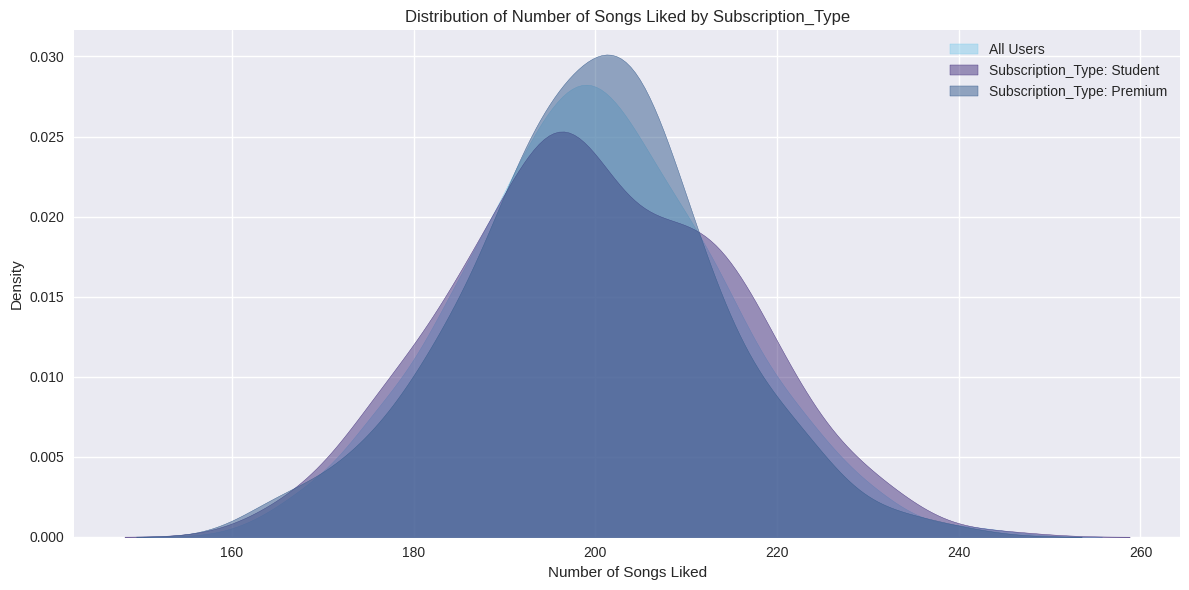

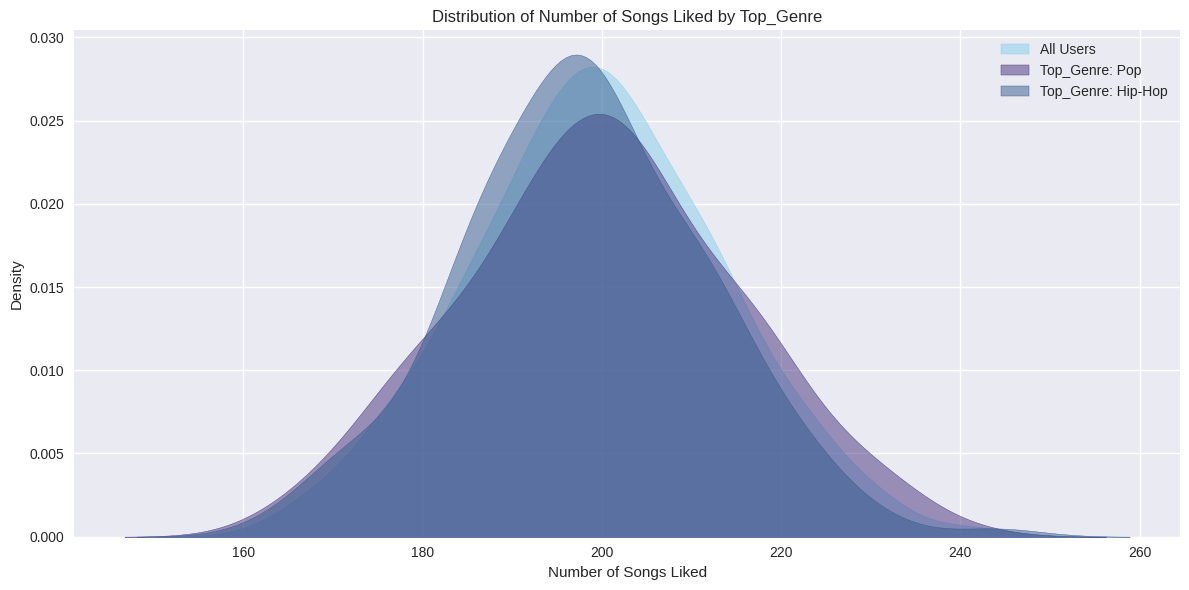

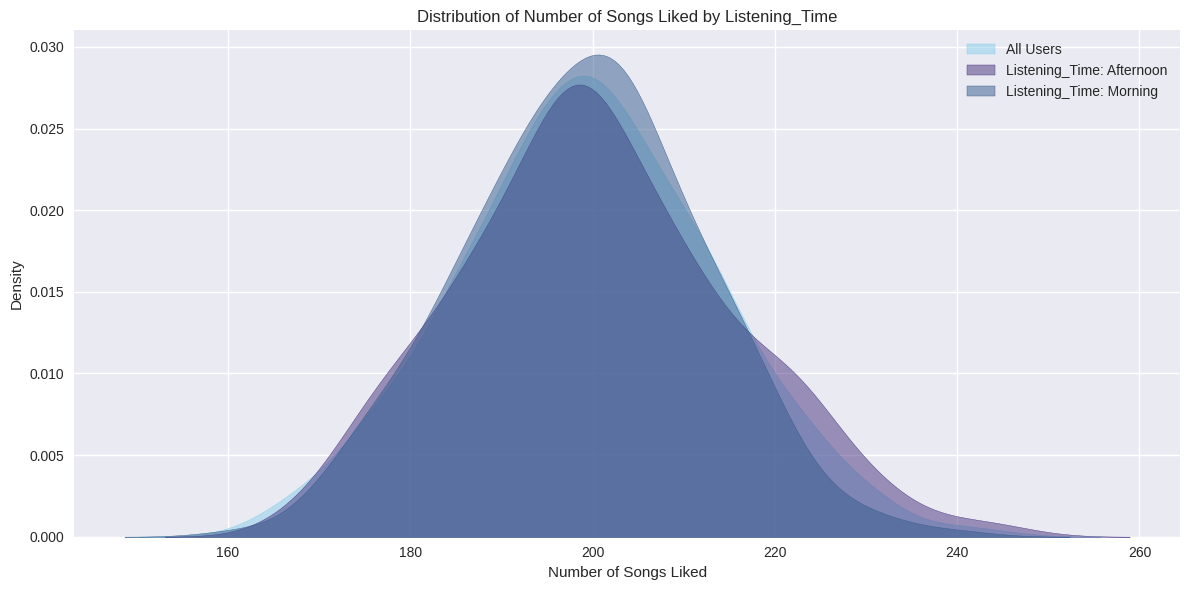

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For reproducibility
np.random.seed(42)

# Create sample data
n_samples = 1000

# Create a DataFrame with the given columns
data = pd.DataFrame({
    'User_ID': range(1, n_samples + 1),
    'Age': np.random.normal(30, 8, n_samples),
    'Country': np.random.choice(['US', 'UK', 'CA', 'AU', 'DE'], n_samples),
    'Streaming_Platform': np.random.choice(['Spotify', 'Apple Music', 'YouTube Music', 'Amazon Music'], n_samples),
    'Top_Genre': np.random.choice(['Pop', 'Rock', 'Hip-Hop', 'Electronic', 'R&B', 'Country'], n_samples),
    'Minutes_Streamed_Per_Day': np.random.gamma(5, 20, n_samples),
    'Number_of_Songs_Liked': np.random.poisson(200, n_samples),
    'Most_Played_Artist': np.random.choice(['Taylor Swift', 'Drake', 'Ed Sheeran', 'BTS', 'The Weeknd'], n_samples),
    'Subscription_Type': np.random.choice(['Free', 'Premium', 'Family', 'Student'], n_samples),
    'Listening_Time': np.random.choice(['Morning', 'Afternoon', 'Night'], n_samples),
    'Discover_Weekly_Engagement': np.random.beta(2, 5, n_samples) * 100,
    'Repeat_Song_Rate': np.random.beta(3, 7, n_samples) * 100
})

# Define numerical variables to create bivariate plots with Number of Songs Liked
numerical_vars = [
    'Age',
    'Minutes_Streamed_Per_Day',
    'Discover_Weekly_Engagement',
    'Repeat_Song_Rate'
]

# Set up figure for bivariate KDE plots
fig, axes = plt.subplots(len(numerical_vars), 1, figsize=(12, 16))
plt.subplots_adjust(hspace=0.4)

# Create bivariate KDE plots for Number of Songs Liked vs each numerical variable
for i, var in enumerate(numerical_vars):
    ax = axes[i]
    sns.kdeplot(
        x=data['Number_of_Songs_Liked'],
        y=data[var],
        fill=True,
        cmap="Purples",
        thresh=0.05,
        levels=10,
        ax=ax
    )
    ax.set_title(f'Distribution of Number of Songs Liked vs {var.replace("_", " ")}')
    ax.set_xlabel('Number of Songs Liked')
    ax.set_ylabel(var.replace("_", " "))

plt.tight_layout()
plt.show()

# Create categorical variables with numeric encoding
platform_map = {'Spotify': 1, 'Apple Music': 2, 'YouTube Music': 3, 'Amazon Music': 4}
subscription_map = {'Free': 1, 'Premium': 2, 'Family': 3, 'Student': 4}
genre_map = {'Pop': 1, 'Rock': 2, 'Hip-Hop': 3, 'Electronic': 4, 'R&B': 5, 'Country': 6}
listening_time_map = {'Morning': 1, 'Afternoon': 2, 'Night': 3}

data['Platform_Code'] = data['Streaming_Platform'].map(platform_map)
data['Subscription_Code'] = data['Subscription_Type'].map(subscription_map)
data['Genre_Code'] = data['Top_Genre'].map(genre_map)
data['Listening_Time_Code'] = data['Listening_Time'].map(listening_time_map)

categorical_vars = [
    'Platform_Code',
    'Subscription_Code',
    'Genre_Code',
    'Listening_Time_Code'
]

# Set up figure for bivariate KDE plots for categorical variables
fig, axes = plt.subplots(len(categorical_vars), 1, figsize=(12, 16))
plt.subplots_adjust(hspace=0.4)

# Create bivariate KDE plots for Number of Songs Liked vs each categorical variable
for i, var in enumerate(categorical_vars):
    ax = axes[i]
    sns.kdeplot(
        x=data['Number_of_Songs_Liked'],
        y=data[var],
        fill=True,
        cmap="Greens",
        thresh=0.05,
        levels=10,
        ax=ax
    )
    ax.set_title(f'Distribution of Number of Songs Liked vs {var.replace("_", " ")}')
    ax.set_xlabel('Number of Songs Liked')
    ax.set_ylabel(var.replace("_", " "))

    # Add labels for categorical codes
    if var == 'Platform_Code':
        ax.set_yticks(list(platform_map.values()))
        ax.set_yticklabels(list(platform_map.keys()))
    elif var == 'Subscription_Code':
        ax.set_yticks(list(subscription_map.values()))
        ax.set_yticklabels(list(subscription_map.keys()))
    elif var == 'Genre_Code':
        ax.set_yticks(list(genre_map.values()))
        ax.set_yticklabels(list(genre_map.keys()))
    elif var == 'Listening_Time_Code':
        ax.set_yticks(list(listening_time_map.values()))
        ax.set_yticklabels(list(listening_time_map.keys()))

plt.tight_layout()
plt.show()

# Also create distribution plots similar to the reference image
# These will show univariate distributions of Number of Songs Liked by different categorical groups

categorical_grouping_vars = ['Streaming_Platform', 'Subscription_Type', 'Top_Genre', 'Listening_Time']

for group_var in categorical_grouping_vars:
    plt.figure(figsize=(12, 6))

    # Get the top 2 most common categories for comparison
    top_categories = data[group_var].value_counts().nlargest(2).index.tolist()

    # Plot the overall distribution
    sns.kdeplot(
        data=data,
        x='Number_of_Songs_Liked',
        fill=True,
        color='skyblue',
        label='All Users',
        alpha=0.5
    )

    # Plot distributions for the top categories
    for category in top_categories:
        sns.kdeplot(
            data=data[data[group_var] == category],
            x='Number_of_Songs_Liked',
            fill=True,
            alpha=0.5,
            label=f'{group_var}: {category}'
        )

    plt.title(f'Distribution of Number of Songs Liked by {group_var}')
    plt.xlabel('Number of Songs Liked')
    plt.ylabel('Density')
    plt.legend()
    plt.tight_layout()
    plt.show()

<Figure size 1400x1000 with 0 Axes>

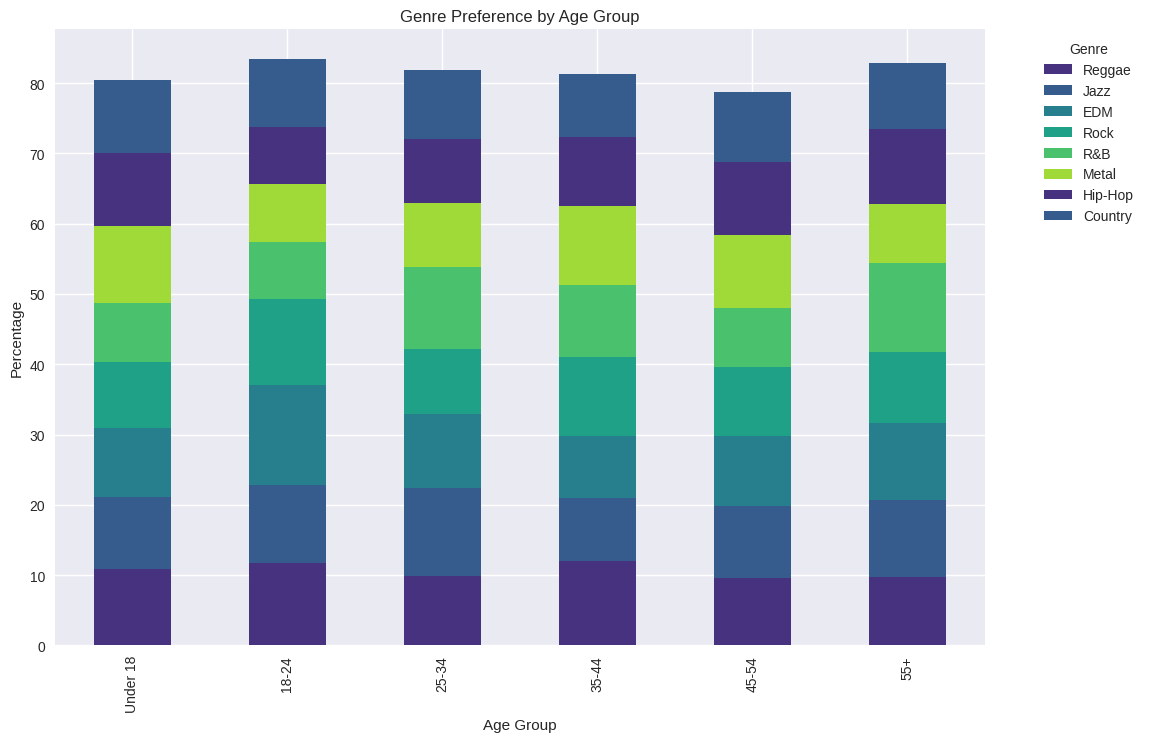

In [ ]:
plt.figure(figsize=(14, 10))
genre_age_cross = pd.crosstab(df['Age_Group'], df['Top Genre'])
genre_age_percent = genre_age_cross.div(genre_age_cross.sum(axis=1), axis=0) * 100


top_genres = df['Top Genre'].value_counts().head(8).index
genre_age_percent = genre_age_percent[top_genres]

genre_age_percent.plot(kind='bar', stacked=True)
plt.title('Genre Preference by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
save_plot('genre_by_age_group')

<Figure size 1400x1000 with 0 Axes>

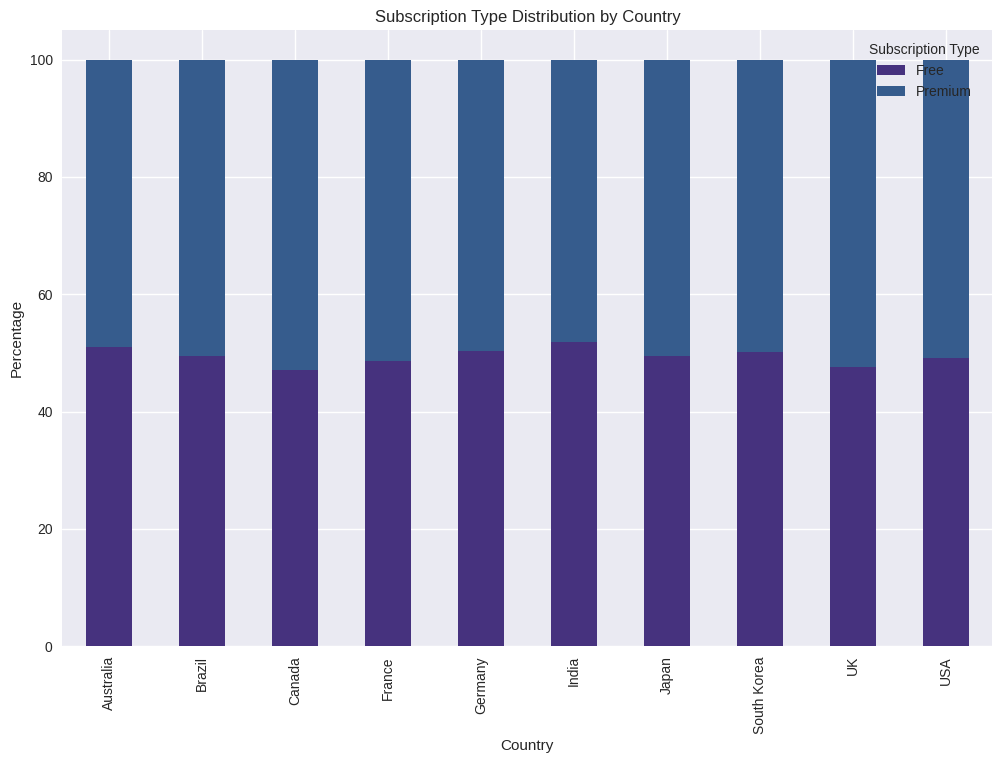

In [ ]:
plt.figure(figsize=(14, 10))
top_countries = df['Country'].value_counts().head(10).index
df_top_countries = df[df['Country'].isin(top_countries)]

subscription_country_cross = pd.crosstab(df_top_countries['Country'], df_top_countries['Subscription Type'])
subscription_country_percent = subscription_country_cross.div(subscription_country_cross.sum(axis=1), axis=0) * 100
subscription_country_percent.plot(kind='bar', stacked=True)
plt.title('Subscription Type Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Percentage')
plt.legend(title='Subscription Type')
save_plot('subscription_by_country')

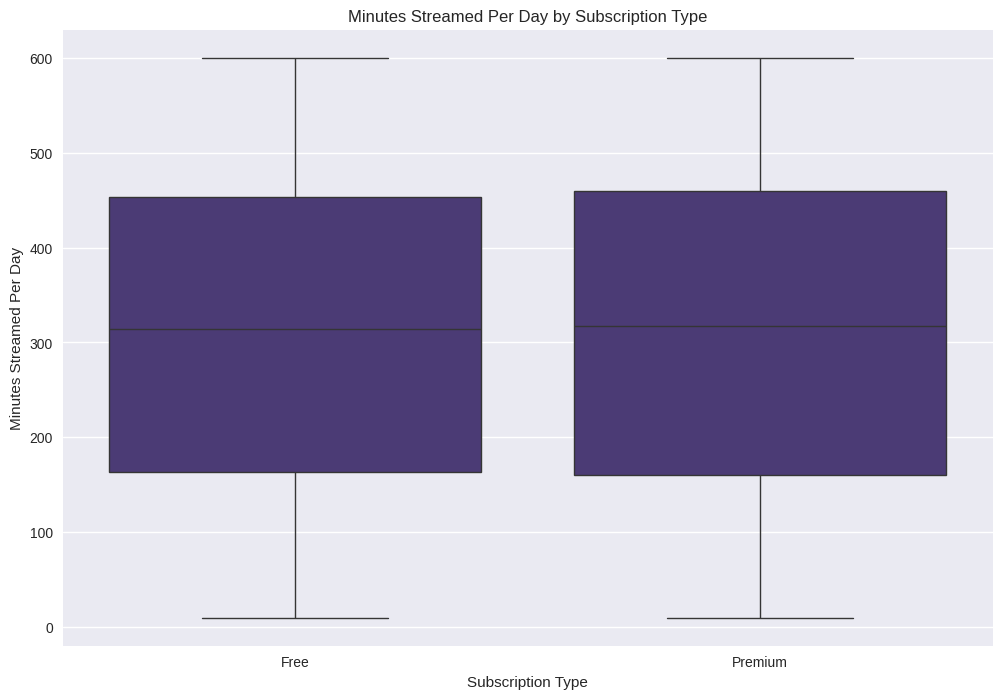

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Subscription Type', y='Minutes Streamed Per Day', data=df)
plt.title('Minutes Streamed Per Day by Subscription Type')
plt.xlabel('Subscription Type')
plt.ylabel('Minutes Streamed Per Day')
save_plot('minutes_by_subscription')

<Figure size 1200x800 with 0 Axes>

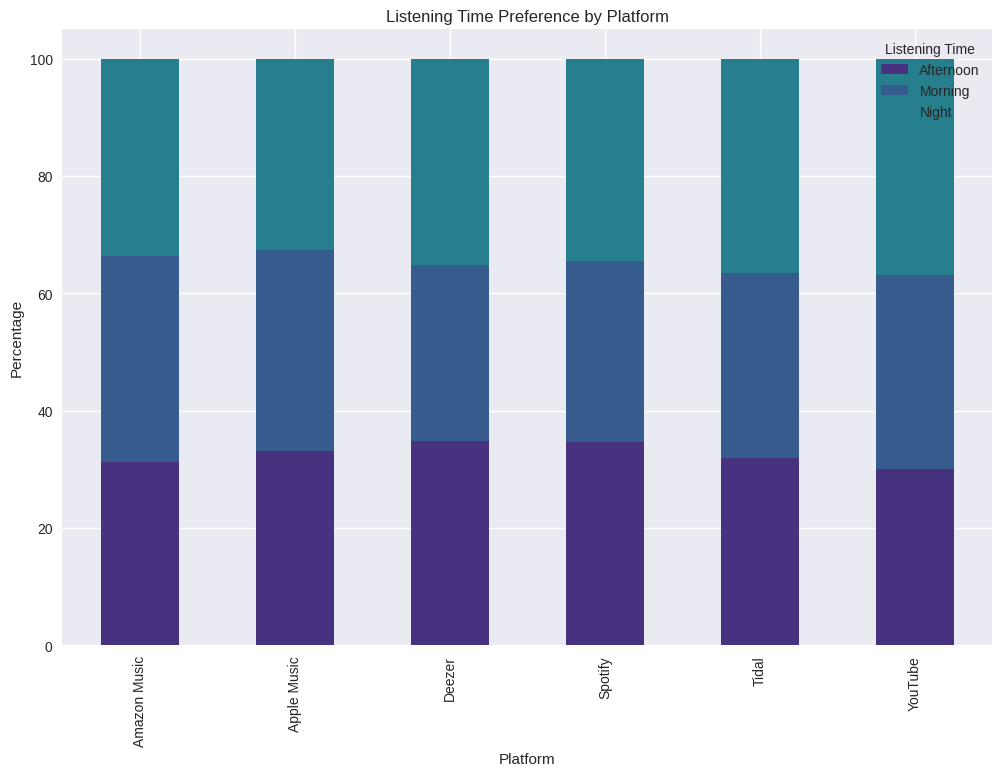

In [ ]:
plt.figure(figsize=(12, 8))
platform_time_cross = pd.crosstab(df['Streaming Platform'], df['Listening Time (Morning/Afternoon/Night)'])
platform_time_percent = platform_time_cross.div(platform_time_cross.sum(axis=1), axis=0) * 100
platform_time_percent.plot(kind='bar', stacked=True)
plt.title('Listening Time Preference by Platform')
plt.xlabel('Platform')
plt.ylabel('Percentage')
plt.legend(title='Listening Time')
save_plot('listening_time_by_platform')

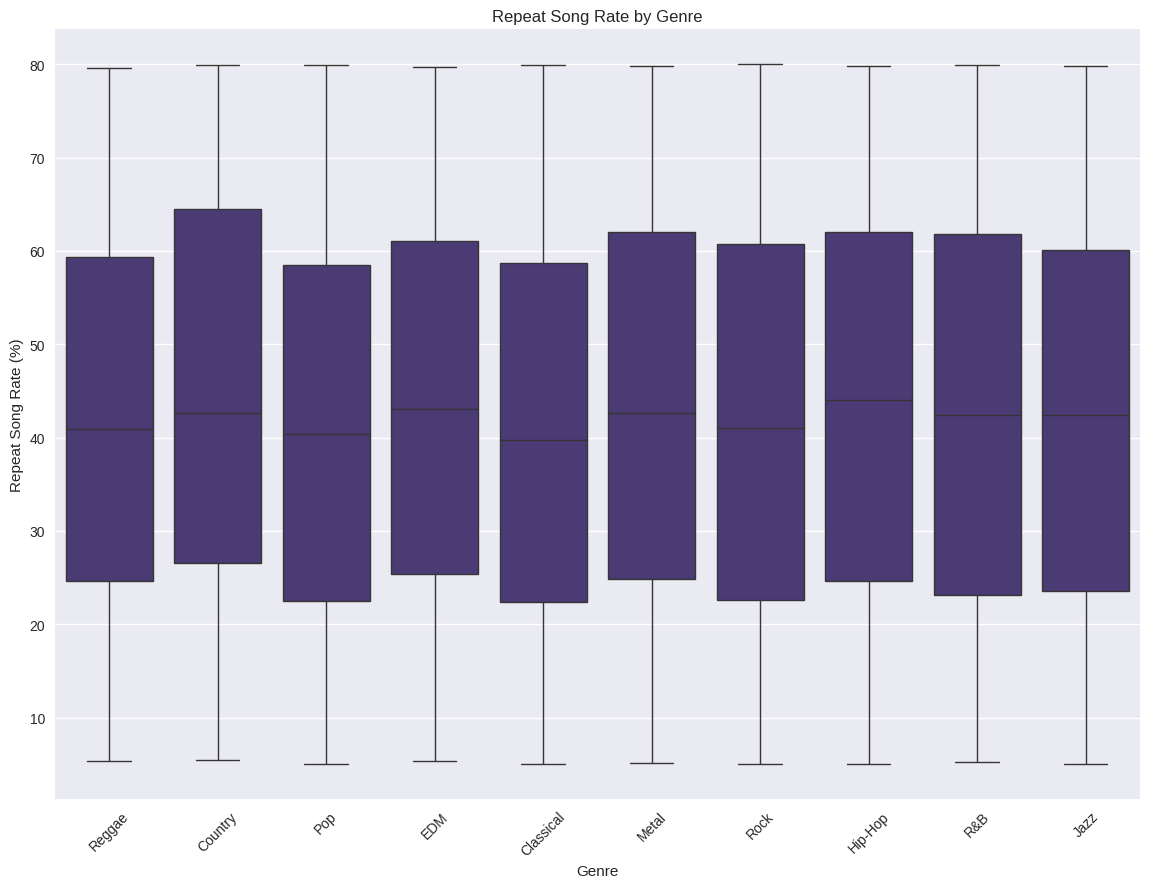

In [ ]:
plt.figure(figsize=(14, 10))
top_genres = df['Top Genre'].value_counts().head(10).index
df_top_genres = df[df['Top Genre'].isin(top_genres)]

sns.boxplot(x='Top Genre', y='Repeat Song Rate (%)', data=df_top_genres)
plt.title('Repeat Song Rate by Genre')
plt.xlabel('Genre')
plt.ylabel('Repeat Song Rate (%)')
plt.xticks(rotation=45)
save_plot('repeat_rate_by_genre')

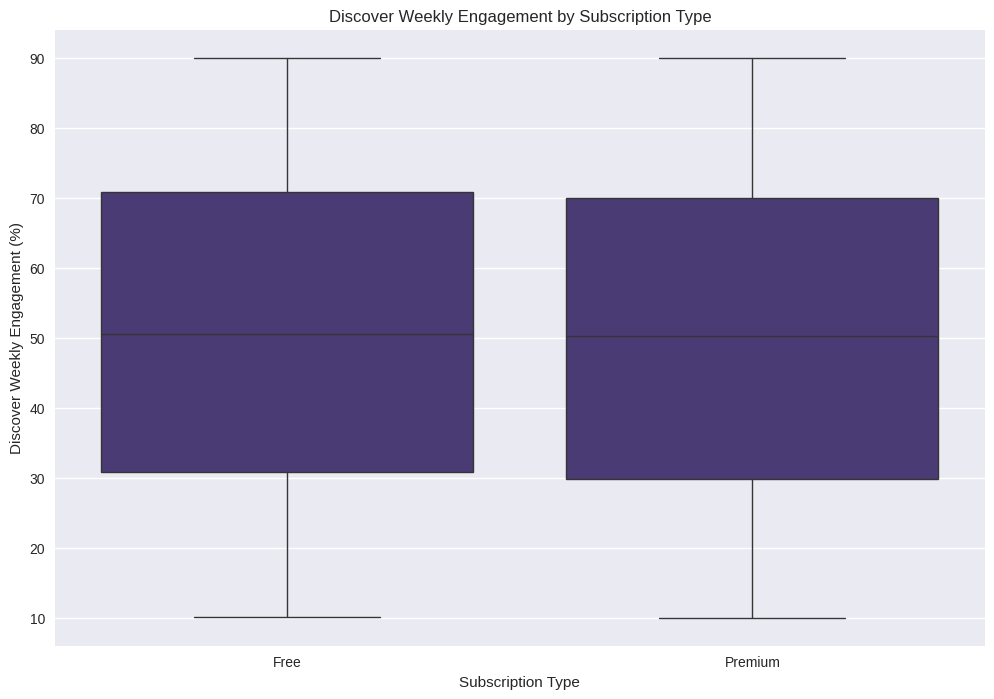

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Subscription Type', y='Discover Weekly Engagement (%)', data=df)
plt.title('Discover Weekly Engagement by Subscription Type')
plt.xlabel('Subscription Type')
plt.ylabel('Discover Weekly Engagement (%)')
save_plot('discovery_by_subscription')


# MULTIVARIATE ANALYSIS

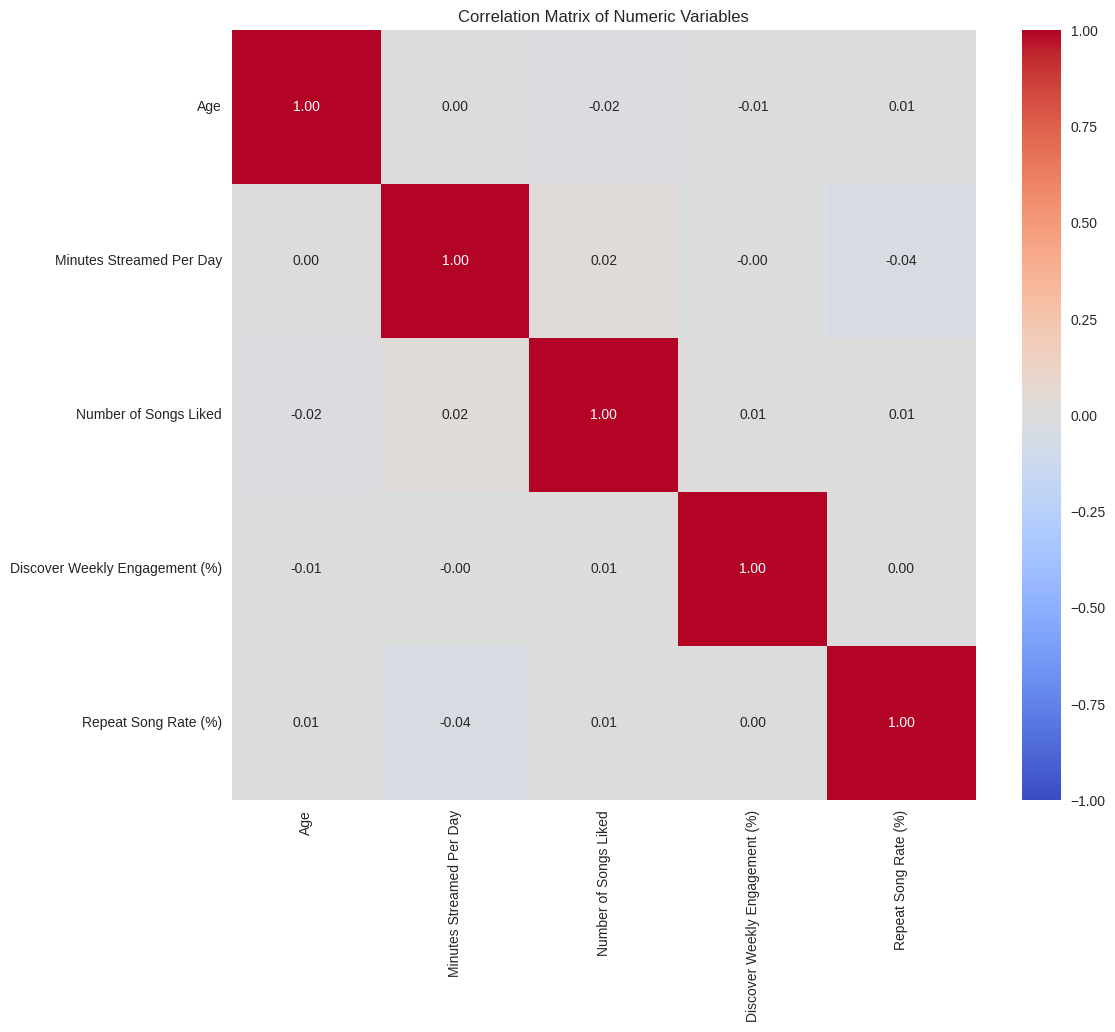

In [ ]:
numeric_cols = ['Age', 'Minutes Streamed Per Day', 'Number of Songs Liked',
                'Discover Weekly Engagement (%)', 'Repeat Song Rate (%)']
correlation = df[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Matrix of Numeric Variables')
save_plot('correlation_matrix')


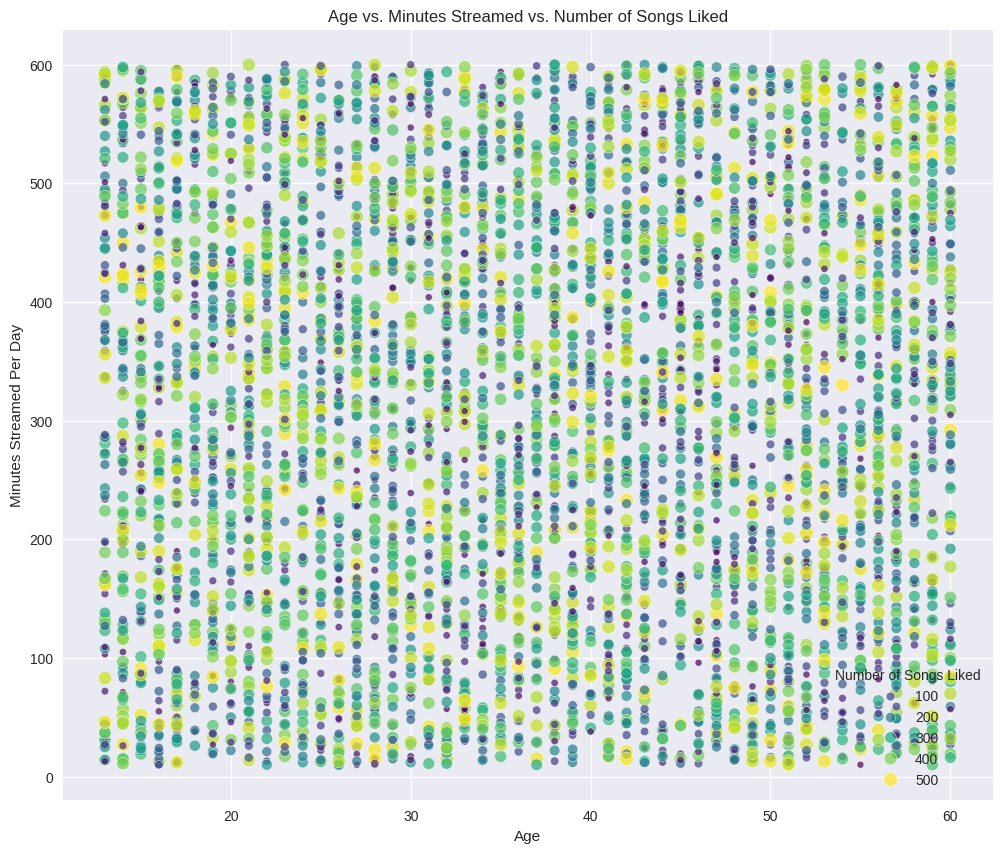

In [ ]:
plt.figure(figsize=(12, 10))
sns.scatterplot(x='Age', y='Minutes Streamed Per Day',
                hue='Number of Songs Liked', size='Number of Songs Liked',
                palette='viridis', data=df, alpha=0.7)
plt.title('Age vs. Minutes Streamed vs. Number of Songs Liked')
plt.xlabel('Age')
plt.ylabel('Minutes Streamed Per Day')
save_plot('age_minutes_songs')


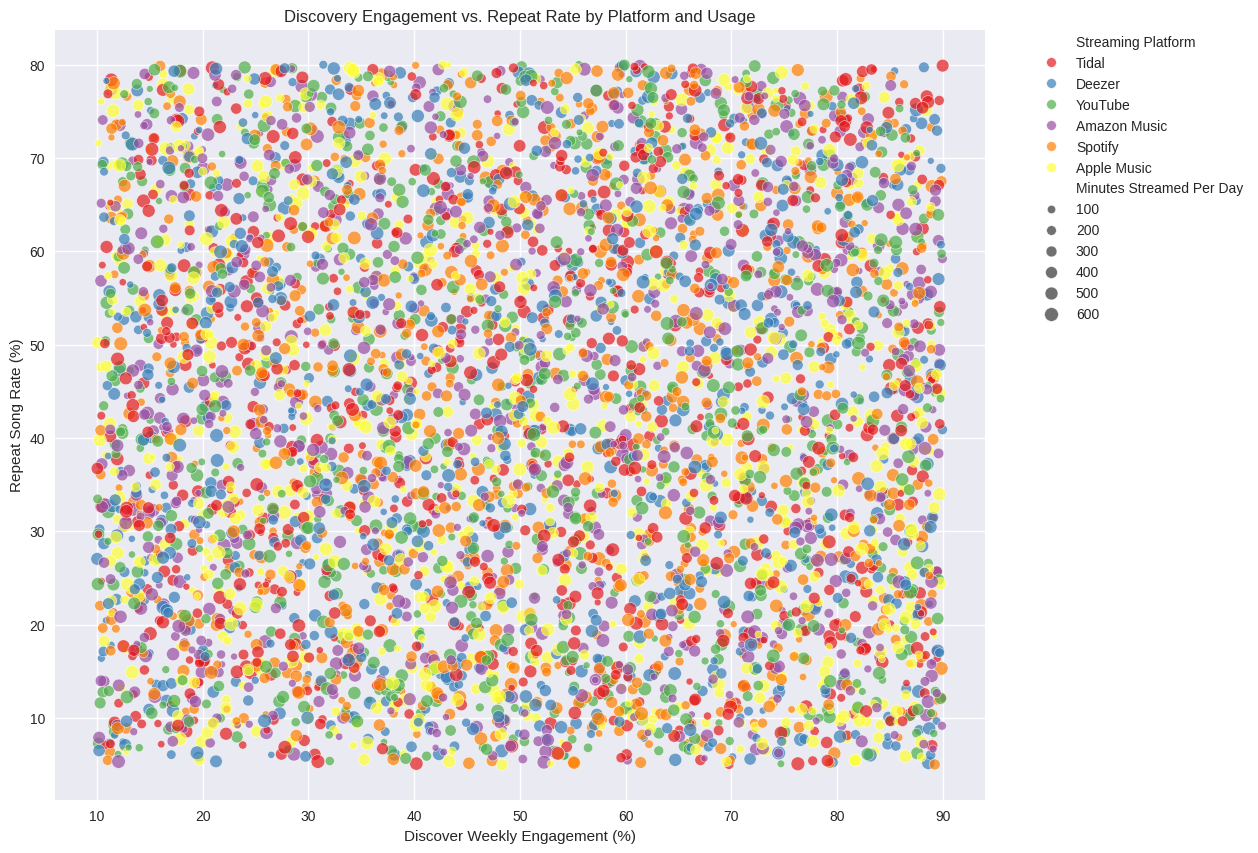

In [ ]:
plt.figure(figsize=(12, 10))
sns.scatterplot(
    x='Discover Weekly Engagement (%)',
    y='Repeat Song Rate (%)',
    hue='Streaming Platform',
    size='Minutes Streamed Per Day',
    palette='Set1',
    data=df,
    alpha=0.7
)
plt.title('Discovery Engagement vs. Repeat Rate by Platform and Usage')
plt.xlabel('Discover Weekly Engagement (%)')
plt.ylabel('Repeat Song Rate (%)')

# Move legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Save the plot
save_plot('discovery_repeat_platform')


# USER SEGMENTATION

In [ ]:
cluster_features = ['Age', 'Minutes Streamed Per Day', 'Number of Songs Liked',
                    'Discover Weekly Engagement (%)', 'Repeat Song Rate (%)']
X = df[cluster_features].copy()


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

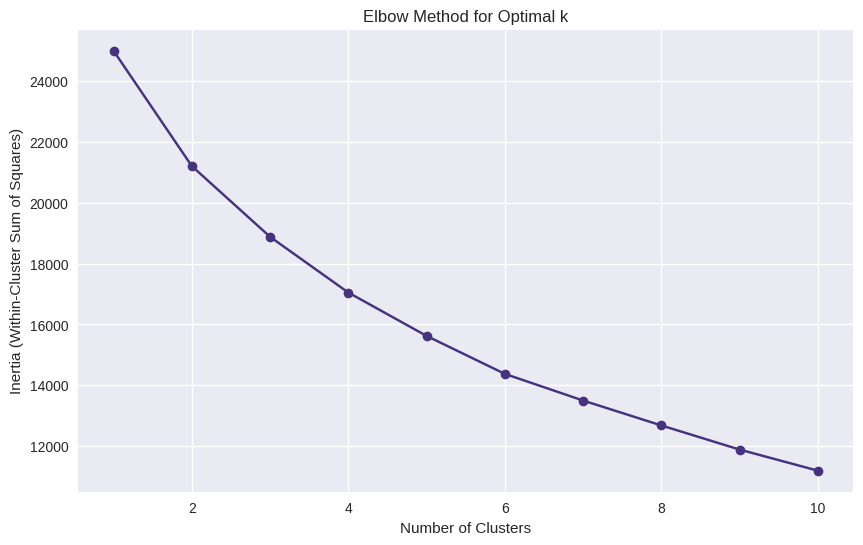

In [ ]:
# Determine optimal number of clusters using elbow method
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, 'o-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal k')
save_plot('elbow_method')

In [ ]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

In [ ]:
cluster_summary = df.groupby('Cluster')[cluster_features].mean()
print("\nCluster Centers:")
print(cluster_summary)


In [ ]:
cluster_summary = df.groupby('Cluster')[cluster_features].mean()
print("\nCluster Centers:")
cluster_summary



Cluster Centers:


Age  Minutes Streamed Per Day  Number of Songs Liked  \
Cluster                                                               
0        35.912226                403.905956             281.416928   
1        37.449349                121.954160             232.732881   
2        36.548840                419.086081             248.771062   

         Discover Weekly Engagement (%)  Repeat Song Rate (%)  
Cluster                                                        
0                             51.841009             62.128251  
1                             50.477533             42.936072  
2                             48.597137             22.584066